# Projet : TimeSeries

# UE : Science des données - Time Series

# Groupe : Amine MEKKI, Ayoub KASSI

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import unidecode
import seaborn as sns

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA


## importing the data

importing the data and unicode column names for a better manipulation of the data

# Question I
## I- DPAE DATA 

In [ ]:

dpae_file = "dpae_data.xlsx"

dpae_data =  pd.read_excel(dpae_file)
# save the excel file as csv in the current directory
dpae_data.to_csv("dpae_data.csv", index=False)

# read the csv file
dpae_data = pd.read_csv("dpae_data.csv", sep =',', header = 0, parse_dates = True, index_col = 2)
dpae_data = dpae_data.sort_index()


def unicodeColumns(data):
    column_names = list(data.columns)
    for i in range(len(data.columns)):
        column_names[i] = unidecode.unidecode(column_names[i])
    data.columns = column_names

unicodeColumns(dpae_data)


In [ ]:
dpae_data


Annee  Trimestre           Duree de contrat  \
﻿Dernier jour du mois                                                
2000-01-31              2000          1  Contrat de plus d'un mois   
2000-01-31              2000          1  Contrat de plus d'un mois   
2000-02-29              2000          1  Contrat de plus d'un mois   
2000-02-29              2000          1  Contrat de plus d'un mois   
2000-03-31              2000          1  Contrat de plus d'un mois   
...                      ...        ...                        ...   
2022-12-31              2022          4  Contrat de plus d'un mois   
2023-01-31              2023          1  Contrat de plus d'un mois   
2023-01-31              2023          1  Contrat de plus d'un mois   
2023-02-28              2023          1  Contrat de plus d'un mois   
2023-02-28              2023          1  Contrat de plus d'un mois   

                           Nature de contrat  DPAE (brut)  DPAE (cvs)  
﻿Dernier jour du mois                                                  
2000-01-31             CDD de plus d'un mois       277127      324376  
2000-01-31                               CDI       279277      226695  
2000-02-29             CDD de plus d'un mois       222287      321417  
2000-02-29                               CDI       220985      229874  
2000-03-31             CDD de plus d'un mois       267406      324373  
...                                      ...          ...         ...  
2022-12-31             CDD de plus d'un mois       249709      401555  
2023-01-31             CDD de plus d'un mois       366756      384401  
2023-01-31                               CDI       535791      422199  
2023-02-28             CDD de plus d'un mois       243429      392442  
2023-02-28                               CDI       375202      429319  

[556 rows x 6 columns]

In [ ]:
dpae_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 556 entries, 2000-01-31 to 2023-02-28
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Annee              556 non-null    int64 
 1   Trimestre          556 non-null    int64 
 2   Duree de contrat   556 non-null    object
 3   Nature de contrat  556 non-null    object
 4   DPAE (brut)        556 non-null    int64 
 5   DPAE (cvs)         556 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 30.4+ KB


In [ ]:
dpae_data.columns

Index(['Annee', 'Trimestre', 'Duree de contrat', 'Nature de contrat',
       'DPAE (brut)', 'DPAE (cvs)'],
      dtype='object')

In [ ]:
dpae_data[["DPAE (brut)","DPAE (cvs)"]].describe()

DPAE (brut)     DPAE (cvs)
count     556.000000     556.000000
mean   308557.080935  308140.258993
std    110519.147753   49432.093999
min     86869.000000  101573.000000
25%    237156.000000  272267.000000
50%    274128.000000  307147.000000
75%    346838.250000  338014.000000
max    830629.000000  440368.000000

In [ ]:
dpae_data

Annee  Trimestre           Duree de contrat  \
﻿Dernier jour du mois                                                
2000-01-31              2000          1  Contrat de plus d'un mois   
2000-01-31              2000          1  Contrat de plus d'un mois   
2000-02-29              2000          1  Contrat de plus d'un mois   
2000-02-29              2000          1  Contrat de plus d'un mois   
2000-03-31              2000          1  Contrat de plus d'un mois   
...                      ...        ...                        ...   
2022-12-31              2022          4  Contrat de plus d'un mois   
2023-01-31              2023          1  Contrat de plus d'un mois   
2023-01-31              2023          1  Contrat de plus d'un mois   
2023-02-28              2023          1  Contrat de plus d'un mois   
2023-02-28              2023          1  Contrat de plus d'un mois   

                           Nature de contrat  DPAE (brut)  DPAE (cvs)  
﻿Dernier jour du mois                                                  
2000-01-31             CDD de plus d'un mois       277127      324376  
2000-01-31                               CDI       279277      226695  
2000-02-29             CDD de plus d'un mois       222287      321417  
2000-02-29                               CDI       220985      229874  
2000-03-31             CDD de plus d'un mois       267406      324373  
...                                      ...          ...         ...  
2022-12-31             CDD de plus d'un mois       249709      401555  
2023-01-31             CDD de plus d'un mois       366756      384401  
2023-01-31                               CDI       535791      422199  
2023-02-28             CDD de plus d'un mois       243429      392442  
2023-02-28                               CDI       375202      429319  

[556 rows x 6 columns]

# Question 1

## 1- Annually


In [ ]:
# Create a dataframe for both CDI and CDD
dpae_data_cdi = dpae_data[dpae_data["Nature de contrat"] == "CDI"]
dpae_data_cdd = dpae_data[dpae_data["Nature de contrat"] == "CDD de plus d'un mois"]


In [ ]:
dpae_data_cdd.columns

Index(['Annee', 'Trimestre', 'Duree de contrat', 'Nature de contrat',
       'DPAE (brut)', 'DPAE (cvs)'],
      dtype='object')

## Evolution du nombre de DPAE CDD

In [ ]:
def plot_graph(data, column, title, x_label, y_label):
    plt.figure(figsize=(16, 6))  # adjust the figure size as needed
    data[column].plot()
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

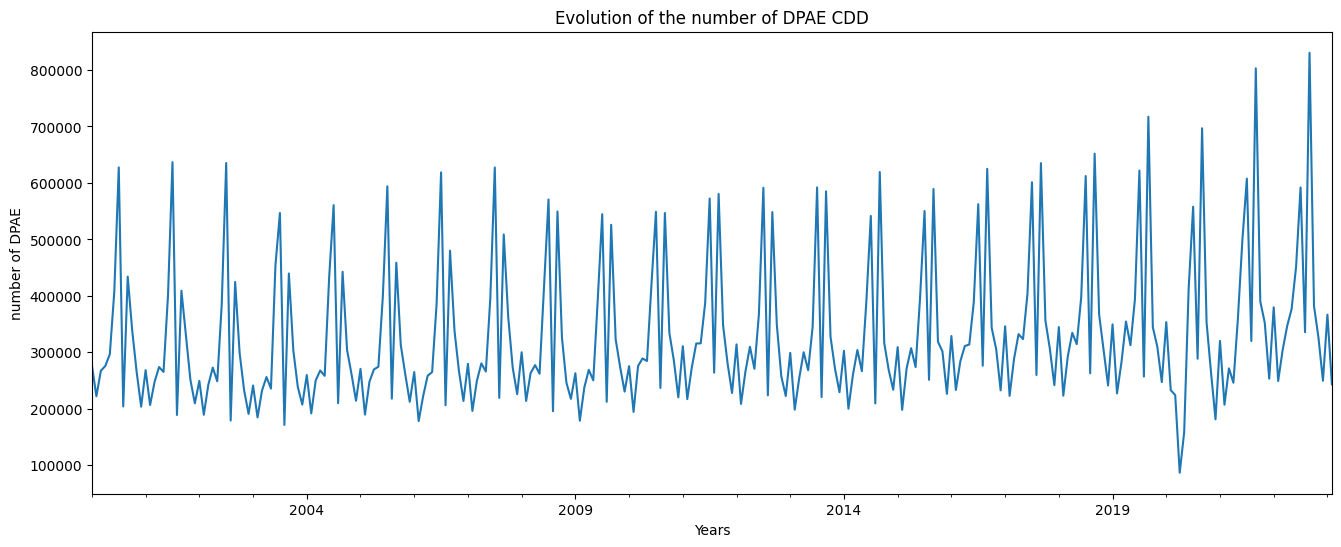

In [ ]:
plot_graph(dpae_data_cdd, 'DPAE (brut)', "Evolution of the number of DPAE CDD", "Years", "number of DPAE")

## Evolution du nombre de DPAE CDI

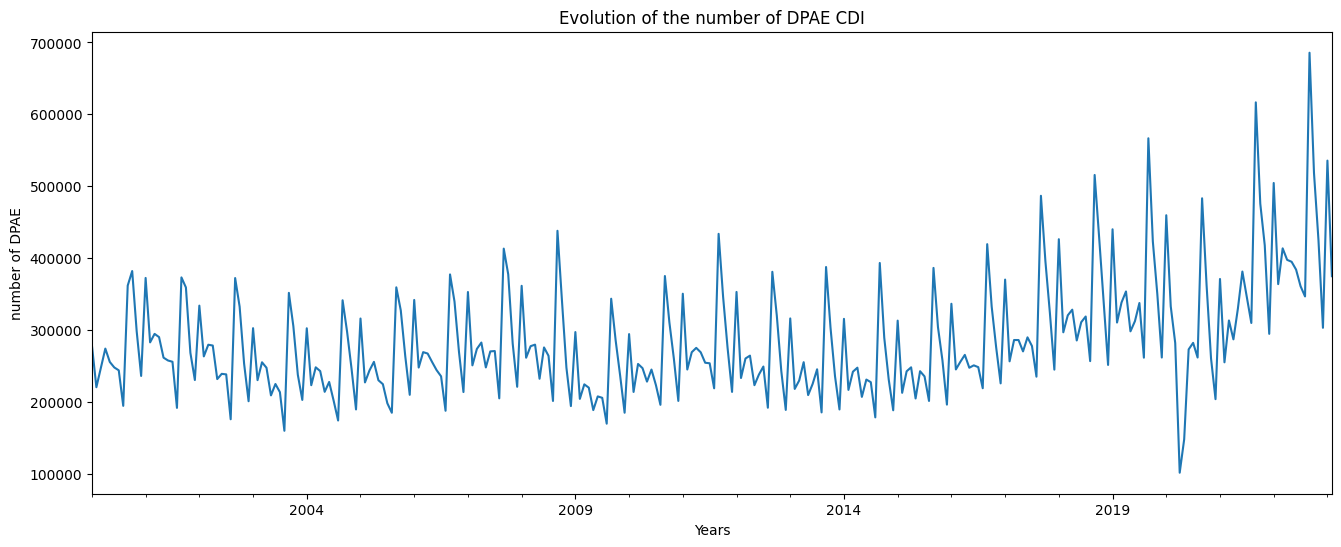

In [ ]:
plot_graph(dpae_data_cdi, 'DPAE (brut)', "Evolution of the number of DPAE CDI", "Years", "number of DPAE")

### Annual Stats

In [ ]:
# Calculer les statistiques trimestrielles pour chaque type de contrat
stats_cdi_annuelle = dpae_data_cdi.groupby("Annee")["DPAE (brut)"].agg(["mean", "median", "std", "var"])
stats_cdd_annuelle = dpae_data_cdd.groupby("Annee")["DPAE (brut)"].agg(["mean", "median", "std", "var"])

In [ ]:
# Afficher les statistiques trimestrielles
print("Annual statistics for CDI :")
print(stats_cdi_annuelle)

Annual statistics for CDI :
                mean    median            std           var
Annee                                                      
2000   270595.500000  252257.0   54763.049320  2.998992e+09
2001   286952.666667  276036.0   56447.216373  3.186288e+09
2002   267075.083333  258742.0   57020.789621  3.251370e+09
2003   245561.666667  234575.5   52534.915535  2.759917e+09
2004   242960.500000  235830.5   49490.806106  2.449340e+09
2005   253874.083333  237452.5   54293.479979  2.947782e+09
2006   271262.666667  261877.5   55533.493223  3.083969e+09
2007   287706.666667  272744.5   62546.549114  3.912071e+09
2008   281711.833333  270441.5   69232.600782  4.793153e+09
2009   231195.583333  214292.0   51967.437930  2.700615e+09
2010   254505.333333  246504.5   51318.119450  2.633549e+09
2011   284248.000000  269560.0   63014.794003  3.970864e+09
2012   262673.916667  246606.0   59833.085761  3.579998e+09
2013   250550.166667  233329.0   58633.503953  3.437888e+09
2014   24785

In [ ]:
print("Annual statistics for CDD : :")
print(stats_cdd_annuelle)

Annual statistics for CDD : :
                mean    median            std           var
Annee                                                      
2000   318357.083333  276531.0  121374.160101  1.473169e+10
2001   307536.416667  266957.0  125368.925778  1.571737e+10
2002   295839.500000  249158.5  130537.170466  1.703995e+10
2003   292621.833333  239876.0  120465.656975  1.451197e+10
2004   304544.750000  260515.0  113276.416871  1.283155e+10
2005   309263.833333  270270.5  118341.788448  1.400478e+10
2006   308269.250000  265085.0  129428.794669  1.675181e+10
2007   323746.500000  276351.5  129701.722601  1.682254e+10
2008   319875.666667  270349.0  126502.608395  1.600291e+10
2009   308658.583333  266067.0  119016.228028  1.416486e+10
2010   326138.583333  285183.5  118167.213503  1.396349e+10
2011   341154.416667  313326.0  119711.729579  1.433090e+10
2012   327607.666667  290408.5  123844.712957  1.533751e+10
2013   324256.583333  285051.0  130701.546077  1.708289e+10
2014   326

## 2- Trimestrial  

### Timeseries

In [ ]:
trimestral_salary_cdi = dpae_data_cdi.groupby(['Annee', 'Trimestre'])['DPAE (brut)'].mean()
trimestral_salary_cdd = dpae_data_cdd.groupby(['Annee', 'Trimestre'])['DPAE (brut)'].mean()


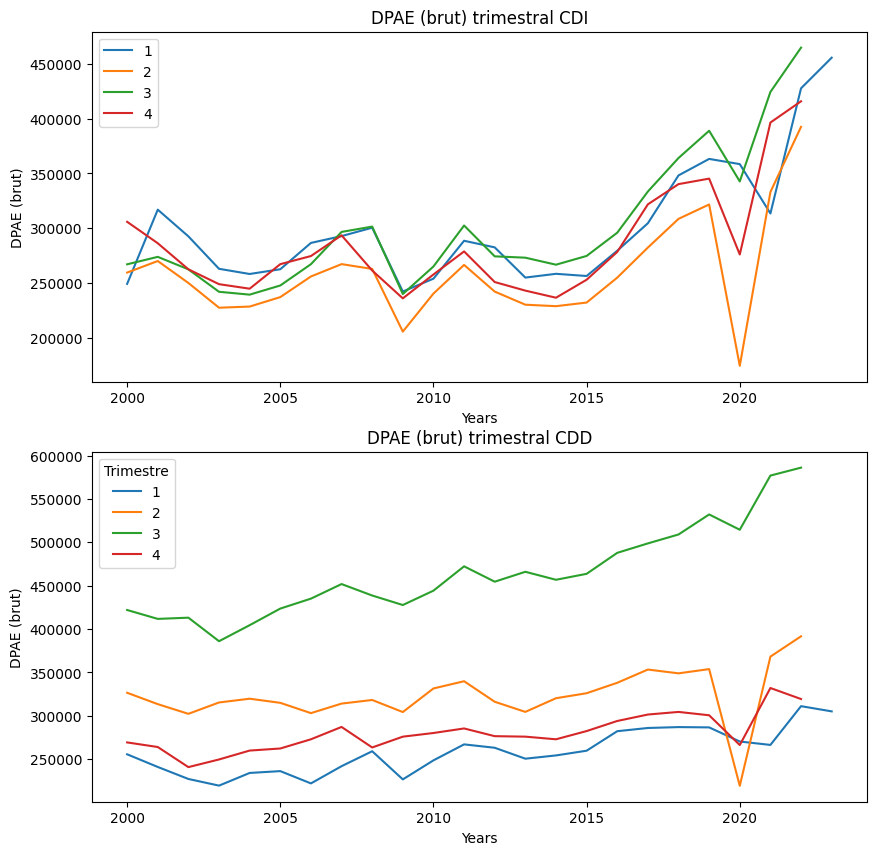

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

trimestral_salary_cdi.unstack().plot(ax=axes[0])
axes[0].set_title('DPAE (brut) trimestral CDI')
axes[0].set_xlabel('Years')
axes[0].set_ylabel('DPAE (brut)')
axes[0].legend()

trimestral_salary_cdd.unstack().plot(ax=axes[1])
axes[1].set_title('DPAE (brut) trimestral CDD')
axes[1].set_xlabel('Years')
axes[1].set_ylabel('DPAE (brut)')
plt.show()

### Stats

In [ ]:
# Group the dataframe by year and trimester and calculate the trimestral DPAE (brut)
trimestral_salary_stats = dpae_data_cdi.groupby(['Annee', 'Trimestre'])['DPAE (brut)'].agg(["mean", "median", "std", "var"])

# pivot the rows and the columns
trimestral_salary_stats = trimestral_salary_stats.pivot_table(index='Annee', columns='Trimestre', values=['mean', 'median', 'std', 'var'])

# display the result
trimestral_salary_stats

mean                                               \
Trimestre              1              2              3              4   
Annee                                                                   
2000       249431.333333  259715.666667  267243.666667  305991.333333   
2001       317051.000000  270259.666667  274053.000000  286447.000000   
2002       292711.000000  250249.000000  262644.666667  262695.666667   
2003       263157.333333  227719.000000  242212.000000  249158.333333   
2004       258434.666667  228752.333333  239619.666667  245035.333333   
2005       262757.333333  237377.666667  247965.000000  267396.333333   
2006       286738.333333  256159.333333  267367.000000  274786.000000   
2007       292959.000000  267423.333333  296763.333333  293681.000000   
2008       300603.000000  263040.666667  301609.333333  261594.333333   
2009       242447.333333  205927.333333  240180.333333  236227.333333   
2010       254176.333333  240594.000000  265265.666667  257985.333333   
2011       288700.000000  266710.000000  302599.333333  278982.666667   
2012       282683.000000  242403.000000  274510.666667  251099.000000   
2013       255165.000000  230451.000000  273293.000000  243291.666667   
2014       258598.666667  229111.000000  266897.000000  236810.666667   
2015       256606.000000  232408.666667  274878.333333  253191.666667   
2016       279621.000000  255106.333333  296051.000000  278547.000000   
2017       304673.333333  282515.000000  333591.666667  321892.333333   
2018       348252.000000  308655.333333  364099.000000  340312.000000   
2019       363280.666667  321782.333333  388920.666667  345332.000000   
2020       358539.000000  174774.000000  342779.000000  276211.333333   
2021       313558.333333  333136.666667  424285.666667  396415.666667   
2022       427607.666667  392494.666667  464670.666667  415783.000000   
2023       455496.500000            NaN            NaN            NaN   

             median                                          std  \
Trimestre         1         2         3         4              1   
Annee                                                              
2000       248032.0  256064.0  244460.0  298927.0   29171.182978   
2001       295079.0  262069.0  256327.0  268791.0   48633.076440   
2002       280011.0  239566.0  238831.0  253686.0   36938.417251   
2003       255626.0  225454.0  214089.0  238317.0   36673.650723   
2004       248632.0  228294.0  202321.0  246689.0   40427.390236   
2005       244199.0  230706.0  198670.0  264101.0   47209.495997   
2006       269713.0  255973.0  236148.0  270124.0   49226.026016   
2007       274234.0  270744.0  271255.0  281608.0   53457.459732   
2008       278011.0  276239.0  264644.0  248233.0   53653.522988   
2009       224954.0  208228.0  206274.0  237212.0   48830.541409   
2010       253313.0  245516.0  223780.0  260844.0   40191.954833   
2011       269619.0  269501.0  254253.0  275719.0   55155.105684   
2012       260880.0  238539.0  249713.0  243499.0   62683.968150   
2013       230338.0  225494.0  245905.0  236320.0   53468.924872   
2014       242545.0  231628.0  227994.0  231688.0   51262.791402   
2015       243103.0  243232.0  236002.0  258307.0   51480.252010   
2016       256265.0  251382.0  248858.0  276344.0   49899.363804   
2017       286552.0  286526.0  278207.0  324288.0   58903.090898   
2018       320857.0  311323.0  319205.0  339581.0   68861.492788   
2019       338613.0  312720.0  337951.0  350356.0   68187.356631   
2020       333357.0  148601.0  282619.0  260933.0   91404.732197   
2021       313735.0  330291.0  345907.0  418087.0   57883.202204   
2022       413903.0  395235.0  361268.0  425323.0   71245.532606   
2023       455496.5       NaN       NaN       NaN  113553.570884   

                                                                var  \
Trimestre             2              3              4             1   
Annee                                                                

Let's look to our time series using a Boxplot graph for each year

<AxesSubplot: xlabel='Annee', ylabel='DPAE (brut)'>

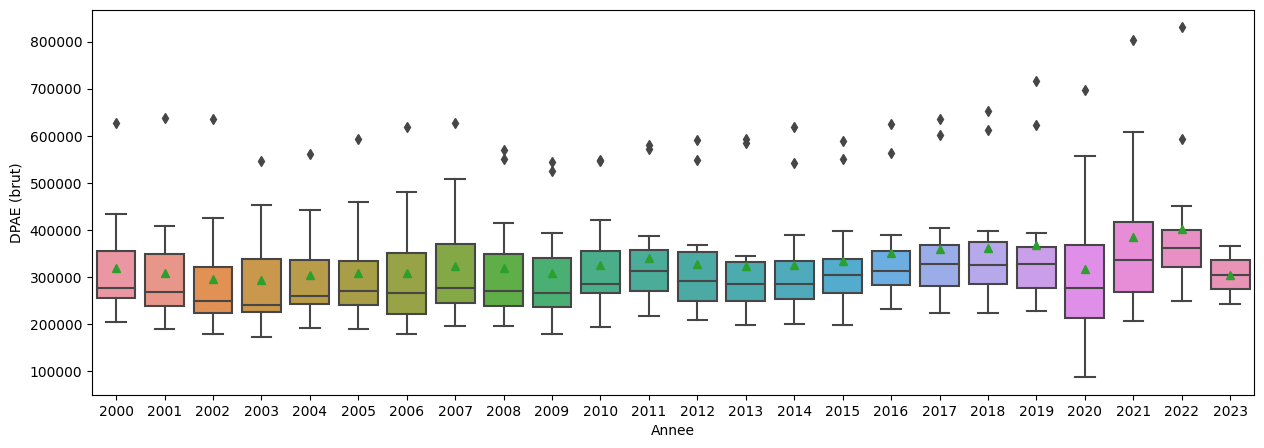

In [ ]:
sns.boxplot(x = 'Annee', y = 'DPAE (brut)', data = dpae_data_cdd, showmeans = True)


<AxesSubplot: xlabel='Annee', ylabel='DPAE (brut)'>

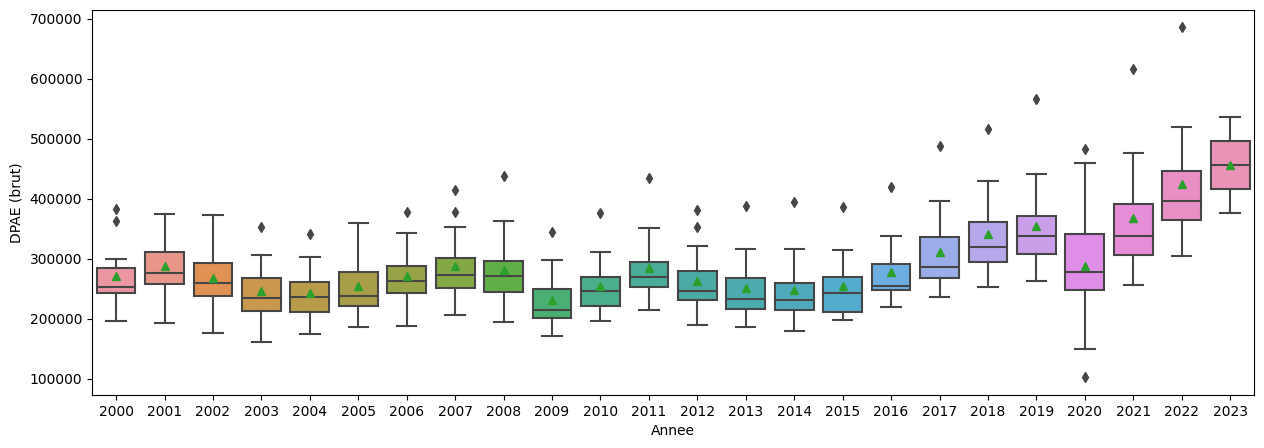

In [ ]:
sns.boxplot(x = 'Annee', y = 'DPAE (brut)', data = dpae_data_cdi, showmeans = True)


Observations : 
Based on the dataset, the graphs and the statistics it appears that the number of DPAE declarations has generally increased over time for both CDD and CDI contracts. However, there are some variations in the trends.

For example, there was a significant decrease in the number of DPAE declarations, Maybe it was because of COVID and there was increase in the number of DPAE for CDI contracts in 2021, which may have been impacted by the vaccination that started in the beginning of the year. On the other hand, the number of DPAE declarations for CDD contracts seems to have fluctuated over time, with some peaks and dips.


## II- EESSA DATA

In [ ]:
eessa_file = "EESSA_data.xlsx"
eessa_data = pd.read_excel(eessa_file)
unicodeColumns(eessa_data)


/home/amine/.local/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


#### Looking into the data

In [ ]:
eessa_data

Libelle   idBank  \
0   Emplois salariés trimestriels - Secteurs princ...  1577239   
1   Emplois salariés trimestriels - Industrie - Se...  1577235   
2   Emplois salariés trimestriels - Construction -...  1577236   
3   Emplois salariés trimestriels - Tertiaire marc...  1577237   
4   Emplois salariés trimestriels - Industries ext...  1577241   
..                                                ...      ...   
75  Emplois salariés trimestriels - Tertiaire non ...  1796851   
76  Emplois salariés trimestriels - Ensemble des s...  1796852   
77  Emplois salariés trimestriels - Ensemble des s...  1796853   
78  Emplois salariés trimestriels - Ensemble des s...  1796854   
79  Emplois salariés trimestriels - Tertiaire non ...  1796855   

   Derniere mise a jour  Periode  1970-T4  1971-T1  1971-T2  1971-T3  1971-T4  \
0      12/05/2017 00:00      NaN  12409.6  12418.8  12485.6  12576.1  12628.8   
1      09/03/2023 07:30      NaN   5440.3   5459.1   5487.7   5522.1   5526.9   
2      09/03/2023 07:30      NaN   1807.9   1807.2   1811.8   1815.7   1808.8   
3      09/03/2023 07:30      NaN     5320     5312   5346.7   5399.6   5453.9   
4      09/03/2023 07:30      NaN    294.7    294.9    295.4    295.7    295.8   
..                  ...      ...      ...      ...      ...      ...      ...   
75     09/03/2023 07:30      NaN      (O)      (O)      (O)      (O)      (O)   
76     09/03/2023 07:30      NaN      (O)      (O)      (O)      (O)      (O)   
77     09/03/2023 07:30      NaN      (O)      (O)      (O)      (O)      (O)   
78     09/03/2023 07:30      NaN      (O)      (O)      (O)      (O)      (O)   
79     09/03/2023 07:30      NaN      (O)      (O)      (O)      (O)      (O)   

   1972-T1  ...  2020-T3  2020-T4  2021-T1  2021-T2  2021-T3  2021-T4  \
0    12689  ...      (O)      (O)      (O)      (O)      (O)      (O)   
1     5536  ...   3164.3   3156.8   3167.2   3175.2   3187.6   3198.2   
2   1804.8  ...   1516.3   1530.4   1551.1   1560.5   1574.3   1581.4   
3   5509.1  ...  12465.2  12386.5  12511.7  12771.4  12949.8  13113.7   
4    296.1  ...    388.2    388.7    391.1    392.7    394.3    394.6   
..     ...  ...      ...      ...      ...      ...      ...      ...   
75     (O)  ...   2641.6   2653.6   2677.8   2690.6   2705.5   2713.6   
76     (O)  ...  25758.1  25719.7  25895.1  26205.5  26438.3  26614.9   
77     (O)  ...   5884.9   5895.1   5893.9   5912.1   5927.2   5915.7   
78     (O)  ...  19873.2  19824.6  20001.2  20293.4  20511.1  20699.2   
79     (O)  ...   8313.6   8339.9   8360.2   8386.4   8412.3   8408.4   

    2022-T1  2022-T2  2022-T3  2022-T4  
0       (O)      (O)      (O)      (O)  
1    3203.8   3214.1   3228.2   3235.8  
2    1585.6   1587.9   1591.6   1592.4  
3   13197.4  13280.2  13349.9  13375.9  
4     395.1      397    399.5    401.3  
..      ...      ...      ...      ...  
75   2720.9   2733.9   2734.5   2735.8  
76  26724.2  26823.9    26908    26952  
77   5919.2   5921.7   5918.3   5917.9  
78    20805  20902.2  20989.7  21034.1  
79   8418.4   8432.9   8429.4   8430.4  

[80 rows x 213 columns]

In [ ]:
eessa_data.columns

Index(['Libelle', 'idBank', 'Derniere mise a jour', 'Periode', '1970-T4',
       '1971-T1', '1971-T2', '1971-T3', '1971-T4', '1972-T1',
       ...
       '2020-T3', '2020-T4', '2021-T1', '2021-T2', '2021-T3', '2021-T4',
       '2022-T1', '2022-T2', '2022-T3', '2022-T4'],
      dtype='object', length=213)

We can see that there are any columns that we can remove from the table. Such as : 'idBank', 'Derniere mise a jour', 'Periode'

### Cleaning

In [ ]:
# if the dataset has the columns ['idBank', 'Derniere mise a jour', 'Periode'] and drop them To avoid errors

try:
    eessa_data.drop(['idBank', 'Derniere mise a jour', 'Periode'], axis=1, inplace=True)
except:
    pass




In [ ]:
eessa_data.head()

Libelle  1970-T4  1971-T1  \
0  Emplois salariés trimestriels - Secteurs princ...  12409.6  12418.8   
1  Emplois salariés trimestriels - Industrie - Se...   5440.3   5459.1   
2  Emplois salariés trimestriels - Construction -...   1807.9   1807.2   
3  Emplois salariés trimestriels - Tertiaire marc...     5320     5312   
4  Emplois salariés trimestriels - Industries ext...    294.7    294.9   

   1971-T2  1971-T3  1971-T4 1972-T1  1972-T2  1972-T3  1972-T4  ...  2020-T3  \
0  12485.6  12576.1  12628.8   12689  12735.9  12815.4  12922.1  ...      (O)   
1   5487.7   5522.1   5526.9    5536   5556.9     5583   5621.2  ...   3164.3   
2   1811.8   1815.7   1808.8  1804.8   1804.8   1805.7   1816.9  ...   1516.3   
3   5346.7   5399.6   5453.9  5509.1   5535.5   5589.3   5648.4  ...  12465.2   
4    295.4    295.7    295.8   296.1      296    296.5    296.9  ...    388.2   

   2020-T4  2021-T1  2021-T2  2021-T3  2021-T4  2022-T1  2022-T2  2022-T3  \
0      (O)      (O)      (O)      (O)      (O)      (O)      (O)      (O)   
1   3156.8   3167.2   3175.2   3187.6   3198.2   3203.8   3214.1   3228.2   
2   1530.4   1551.1   1560.5   1574.3   1581.4   1585.6   1587.9   1591.6   
3  12386.5  12511.7  12771.4  12949.8  13113.7  13197.4  13280.2  13349.9   
4    388.7    391.1    392.7    394.3    394.6    395.1      397    399.5   

   2022-T4  
0      (O)  
1   3235.8  
2   1592.4  
3  13375.9  
4    401.3  

[5 rows x 210 columns]

In [ ]:
def sector(name):
    secteur = "-".join(name.split("-")[1:])
    return (secteur)
    
  

In [ ]:
eessa_data["Libelle"] = eessa_data["Libelle"].apply(sector)

In [ ]:
# check if the essaa data isn't transposed, and then transpose it. To avoid errors from happening or apply the same transformation 2 times if we run the cell two times
if eessa_data.shape[0] < eessa_data.shape[1]:
    eessa_data = eessa_data.transpose()
    eessa_data.columns = eessa_data.iloc[0]
    eessa_data = eessa_data.iloc[1:]
eessa_data

Libelle  Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée  \
1970-T4                                            12409.6                                                
1971-T1                                            12418.8                                                
1971-T2                                            12485.6                                                
1971-T3                                            12576.1                                                
1971-T4                                            12628.8                                                
...                                                    ...                                                
2021-T4                                                (O)                                                
2022-T1                                                (O)                                                
2022-T2                                                (O)                                                
2022-T3                                                (O)                                                
2022-T4                                                (O)                                                

Libelle  Industrie - Sections B, C, D et E - CVS  \
1970-T4                                   5440.3   
1971-T1                                   5459.1   
1971-T2                                   5487.7   
1971-T3                                   5522.1   
1971-T4                                   5526.9   
...                                          ...   
2021-T4                                   3198.2   
2022-T1                                   3203.8   
2022-T2                                   3214.1   
2022-T3                                   3228.2   
2022-T4                                   3235.8   

Libelle  Construction - Section F - CVS  \
1970-T4                          1807.9   
1971-T1                          1807.2   
1971-T2                          1811.8   
1971-T3                          1815.7   
1971-T4                          1808.8   
...                                 ...   
2021-T4                          1581.4   
2022-T1                          1585.6   
2022-T2                          1587.9   
2022-T3                          1591.6   
2022-T4                          1592.4   

Libelle  Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS  \
1970-T4                                               5320                     
1971-T1                                               5312                     
1971-T2                                             5346.7                     
1971-T3                                             5399.6                     
1971-T4                                             5453.9                     
...                                                    ...                     
2021-T4                                            13113.7                     
2022-T1                                            13197.4                     
2022-T2                                            13280.2                     
2022-T3                                            13349.9                     
2022-T4                                            13375.9                     

Libelle  Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS  \
1970-T4                                              294.7                                           
1971-T1                                              294.9                                           
1971-T2                                              295.4                                           
1971-T3                                              295.7                                           
1971-T4                                              295.8                                           


Let's replace the yyyy-Tx format with date range format

In [ ]:
date_range = pd.date_range(start='1970-10-01', end='2022-12-31', freq='Q-DEC')
eessa_data["Trimester"] = date_range
eessa_data.set_index("Trimester", inplace=True)
eessa_data = eessa_data.sort_index()


In [ ]:
# how many "O"s are there in the dataset do it in a function
def countOs(data):
    data_mask = data.eq("(O)")
    sumOs = data_mask.sum().sum()
    return sumOs

countOs(eessa_data)

5318

In [ ]:
# how many "O"s are there in each column
count = eessa_data.applymap(lambda x: x == '(O)').sum(axis=0)
count

Libelle
 Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée             23
 Industrie - Sections B, C, D et E - CVS                                                                     0
 Construction - Section F - CVS                                                                              0
 Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS                                         0
 Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS                   0
                                                                                                          ... 
 Tertiaire non marchand - Établissements privés - Sections O et Q - CVS                                    160
 Ensemble des salariés - Toutes les sections (hors activités extra-territoriales) - CVS                    160
 Ensemble des salariés, public - Toutes les sections (hors activités extra-territoriales), public - CVS 

In [ ]:
# Let's replace the "O" by NaN
if countOs(eessa_data) > 0:
    eessa_data.replace("(O)", np.nan, inplace=True)


In [ ]:
eessa_data

Libelle      Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée  \
Trimester                                                                                                     
1970-12-31                                            12409.6                                                 
1971-03-31                                            12418.8                                                 
1971-06-30                                            12485.6                                                 
1971-09-30                                            12576.1                                                 
1971-12-31                                            12628.8                                                 
...                                                       ...                                                 
2021-12-31                                                NaN                                                 
2022-03-31                                                NaN                                                 
2022-06-30                                                NaN                                                 
2022-09-30                                                NaN                                                 
2022-12-31                                                NaN                                                 

Libelle      Industrie - Sections B, C, D et E - CVS  \
Trimester                                              
1970-12-31                                    5440.3   
1971-03-31                                    5459.1   
1971-06-30                                    5487.7   
1971-09-30                                    5522.1   
1971-12-31                                    5526.9   
...                                              ...   
2021-12-31                                    3198.2   
2022-03-31                                    3203.8   
2022-06-30                                    3214.1   
2022-09-30                                    3228.2   
2022-12-31                                    3235.8   

Libelle      Construction - Section F - CVS  \
Trimester                                     
1970-12-31                           1807.9   
1971-03-31                           1807.2   
1971-06-30                           1811.8   
1971-09-30                           1815.7   
1971-12-31                           1808.8   
...                                     ...   
2021-12-31                           1581.4   
2022-03-31                           1585.6   
2022-06-30                           1587.9   
2022-09-30                           1591.6   
2022-12-31                           1592.4   

Libelle      Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS  \
Trimester                                                                          
1970-12-31                                             5320.0                      
1971-03-31                                             5312.0                      
1971-06-30                                             5346.7                      
1971-09-30                                             5399.6                      
1971-12-31                                             5453.9                      
...                                                       ...                      
2021-12-31                                            13113.7                      
2022-03-31                                            13197.4                      
2022-06-30                                            13280.2                      
2022-09-30                                            13349.9                      
2022-12-31                                            13375.9                      

Libelle      Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS  \
Trimester       

In [ ]:
eessa_data['Total'] = eessa_data.sum(axis=1)
eessa_data

Libelle      Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée  \
Trimester                                                                                                     
1970-12-31                                            12409.6                                                 
1971-03-31                                            12418.8                                                 
1971-06-30                                            12485.6                                                 
1971-09-30                                            12576.1                                                 
1971-12-31                                            12628.8                                                 
...                                                       ...                                                 
2021-12-31                                                NaN                                                 
2022-03-31                                                NaN                                                 
2022-06-30                                                NaN                                                 
2022-09-30                                                NaN                                                 
2022-12-31                                                NaN                                                 

Libelle      Industrie - Sections B, C, D et E - CVS  \
Trimester                                              
1970-12-31                                    5440.3   
1971-03-31                                    5459.1   
1971-06-30                                    5487.7   
1971-09-30                                    5522.1   
1971-12-31                                    5526.9   
...                                              ...   
2021-12-31                                    3198.2   
2022-03-31                                    3203.8   
2022-06-30                                    3214.1   
2022-09-30                                    3228.2   
2022-12-31                                    3235.8   

Libelle      Construction - Section F - CVS  \
Trimester                                     
1970-12-31                           1807.9   
1971-03-31                           1807.2   
1971-06-30                           1811.8   
1971-09-30                           1815.7   
1971-12-31                           1808.8   
...                                     ...   
2021-12-31                           1581.4   
2022-03-31                           1585.6   
2022-06-30                           1587.9   
2022-09-30                           1591.6   
2022-12-31                           1592.4   

Libelle      Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS  \
Trimester                                                                          
1970-12-31                                             5320.0                      
1971-03-31                                             5312.0                      
1971-06-30                                             5346.7                      
1971-09-30                                             5399.6                      
1971-12-31                                             5453.9                      
...                                                       ...                      
2021-12-31                                            13113.7                      
2022-03-31                                            13197.4                      
2022-06-30                                            13280.2                      
2022-09-30                                            13349.9                      
2022-12-31                                            13375.9                      

Libelle      Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS  \
Trimester       

<AxesSubplot: xlabel='Trimester'>

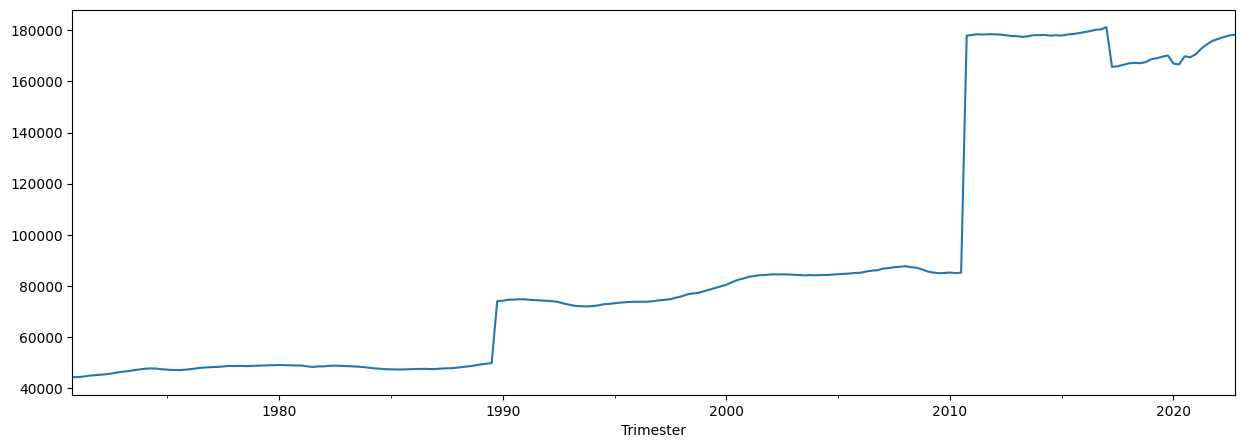

In [ ]:
eessa_data["Total"].plot()

In [ ]:
# get the total until the year 1990
y1989_total = eessa_data["Total"]['1989']
y1990_total = eessa_data["Total"]['1990']

# get rate of increase from 1970 to 1990
rate_89_90 = ((y1990_total[0] - y1989_total[0]) / y1989_total[0]) * 100


# do the same for 1990 to 2010
y2009_total = eessa_data["Total"]['2009']
y2011_total = eessa_data["Total"]['2011']

# get rate of increase from 1990 to 2010
rate_09_11 = ((y2011_total[0] - y2009_total[0]) / y2009_total[0]) * 100


From the above graph we can conclude an increase in jobs over the years which can potentially be explained by the creation of new sectors in certain areas. It has been increasing since the 1970s, with some minor declines.

In 1990, there was the development of many sectors which made it possible to create many jobs and therefore the hiring of multiple employees. An increse rate of 50% from 1989 to 1990. The same applies to 2010, when the number of employees increased by approximately 108% from 2009 to 2011.

### Focusing only on 2 sectors


In [ ]:
eessa_data.columns


Index([' Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée',
       ' Industrie - Sections B, C, D et E - CVS',
       ' Construction - Section F - CVS',
       ' Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS',
       ' Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS',
       ' Fabrication de denrées alimentaires, de boissons et de produits à base de tabac - A17 : C1 - CVS',
       ' Cokéfaction et raffinage - A17 : C2 - CVS',
       ' Fabrication d'équipements électriques, électroniques, informatiques, fabrication de machines - A17 : C3 - CVS',
       ' Fabrication de matériels de transport - A17 : C4 - CVS',
       ' Fabrication d'autres produits industriels - A17 : C5 - CVS',
       ' Construction - A17 : FZ - CVS',
       ' Commerce, réparation d'automobiles et de motocycles - A17 : GZ - CVS',
       ' Transports et entreposage - A17 : HZ - CVS',
       ' Hébergement et rest

From the above sectors i decided to choose the sectors :
- ' Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée',
- ' Industrie - Sections B, C, D et E - CVS',

##### Sector 1

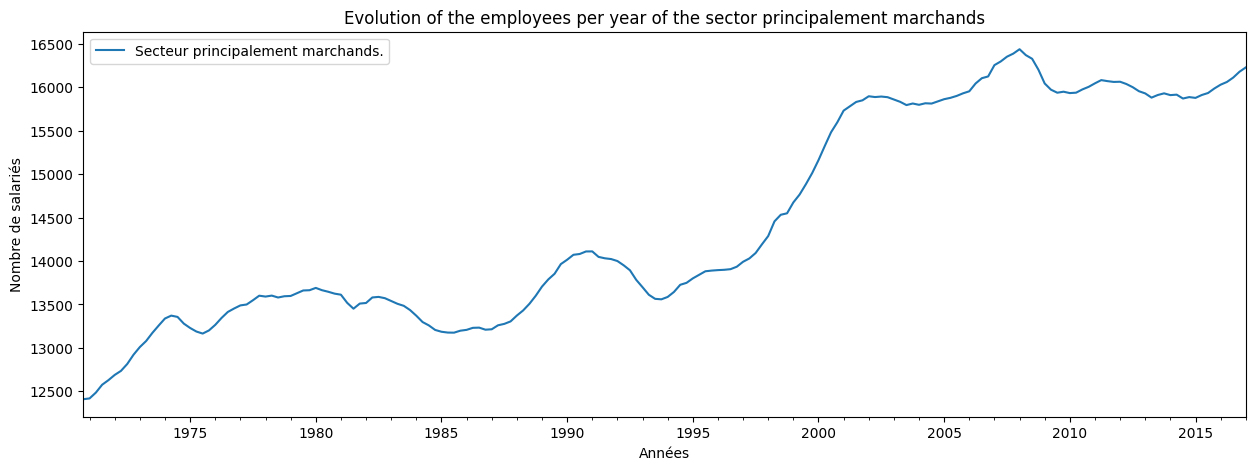

In [ ]:
# select the first sector column of the eessa_data

sector1 = eessa_data.iloc[:, 0]
# define a function for the above code
def plotSector(sector, legend, title):
    sector.dropna(inplace=True)
    sector.plot()
    plt.legend([legend], loc = 'best')
    plt.xlabel("Années")
    plt.ylabel("Nombre de salariés")
    plt.title(title)
plotSector(sector1, "Secteur principalement marchands.", "Evolution of the employees per year of the sector principalement marchands")

### some statistics about

In [ ]:
sector1_stats = sector1.groupby(sector1.index.year).agg(["mean", "median", "std", "var"])
sector1_stats

mean    median         std           var
Trimester                                               
1970       12409.600  12409.60         NaN           NaN
1971       12527.325  12530.85   93.443080   8731.609167
1972       12790.600  12775.65  102.016241  10407.313333
1973       13129.900  13126.20  108.282316  11725.060000
1974       13336.650  13347.60   40.335634   1626.963333
1975       13196.100  13194.85   26.876384    722.340000
1976       13369.200  13379.10   82.731775   6844.546667
1977       13534.650  13524.20   51.241747   2625.716667
1978       13591.925  13592.75    9.077215     82.395833
1979       13638.000  13645.15   31.080004    965.966667
1980       13656.300  13654.95   28.022015    785.233333
1981       13523.200  13514.40   66.597147   4435.180000
1982       13564.250  13576.45   32.085770   1029.496667
1983       13492.025  13496.15   43.770262   1915.835833
1984       13283.400  13278.20   68.904185   4747.786667
1985       13184.100  13181.40   10.467728    109.573333
1986       13220.525  13220.40   13.653907    186.429167
1987       13264.125  13268.45   37.911509   1437.282500
1988       13477.750  13469.45   98.351495   9673.016667
1989       13827.850  13820.55  109.370273  11961.856667
1990       14069.275  14076.20   39.896481   1591.729167
1991       14053.075  14039.45   39.840463   1587.262500
1992       13906.750  13922.05   93.275238   8700.270000
1993       13608.650  13588.35   64.517930   4162.563333
1994       13676.450  13685.20   74.993444   5624.016667
1995       13853.225  13861.50   41.454423   1718.469167
1996       13908.700  13902.55   17.709696    313.633333
1997       14076.250  14060.95   87.487237   7654.016667
1998       14456.350  14494.40  119.556556  14293.770000
1999       14834.125  14824.90  146.792765  21548.115833
2000       15390.575  15402.55  189.869295  36050.349167
2001       15797.850  15805.70   53.321259   2843.156667
2002       15890.225  15889.80    4.992912     24.929167
2003       15824.325  15822.25   27.317195    746.229167
2004       15815.425  15813.65   16.109495    259.515833
2005       15892.425  15888.85   29.275402    857.049167
2006       16055.975  16073.35   76.725675   5886.829167
2007       16322.225  16323.95   58.686533   3444.109167
2008       16333.950  16348.30   99.015605   9804.090000
2009       15974.975  15960.00   47.665388   2271.989167
2010       15962.275  15956.05   33.912277   1150.042500
2011       16064.400  16065.45   15.562990    242.206667
2012       16013.675  16018.80   47.299357   2237.229167
2013       15912.250  15919.60   23.036420    530.676667
2014       15895.025  15897.80   20.662748    426.949167
2015       15926.675  15922.00   45.520572   2072.122500
2016       16094.750  16085.70   64.983100   4222.803333
2017       16227.700  16227.70         NaN           NaN

Observations : 

From the above graph and statistics We can coclude that the mean number of employees has increased during the years from 1970 to 2017 with some minor dropouts in some years.

##### Sector 2

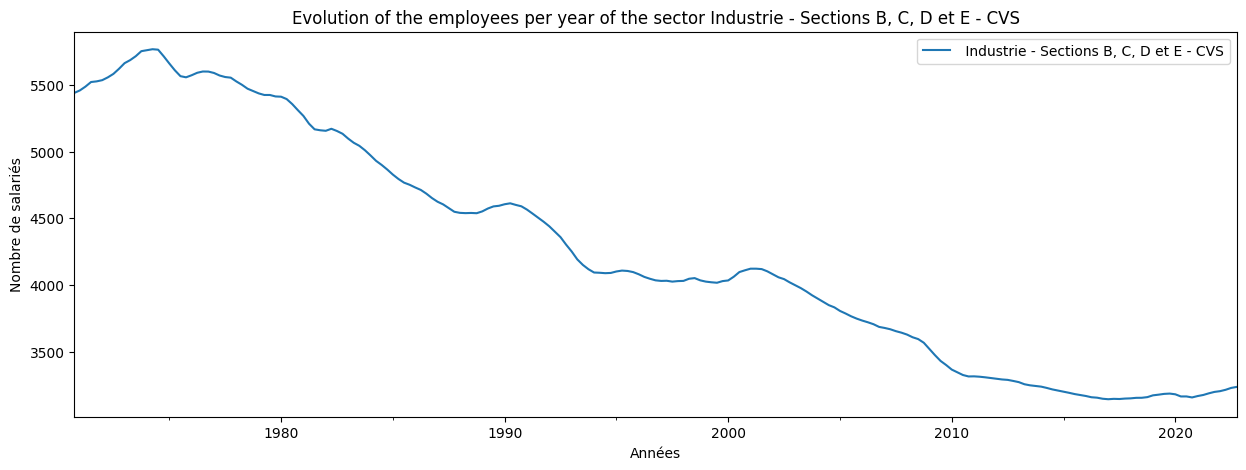

In [ ]:
sector2 = eessa_data.iloc[:, 1]
plotSector(sector2, ' Industrie - Sections B, C, D et E - CVS' , "Evolution of the employees per year of the sector Industrie - Sections B, C, D et E - CVS")

In [ ]:
sector2_stats = sector2.groupby(sector2.index.year).agg(["mean", "median", "std", "var"])
sector2_stats

mean   median        std          var
Trimester                                           
1970       5440.300  5440.30        NaN          NaN
1971       5498.950  5504.90  31.789464  1010.570000
1972       5574.275  5569.95  36.719420  1348.315833
1973       5704.725  5701.00  38.853089  1509.562500
1974       5752.150  5762.85  24.992599   624.630000
1975       5598.575  5587.85  47.647761  2270.309167
1976       5591.375  5595.85  13.060213   170.569167
1977       5568.750  5565.20  15.651517   244.970000
1978       5488.450  5486.65  31.915775  1018.616667
1979       5425.125  5424.90   9.352495    87.469167
1980       5368.475  5375.35  44.646864  1993.342500
1981       5201.225  5188.45  49.422962  2442.629167
1982       5154.125  5155.55  15.369098   236.209167
1983       5054.725  5055.15  36.888605  1360.769167
1984       4917.175  4915.55  45.091786  2033.269167
1985       4785.550  4781.30  33.524170  1123.870000
1986       4695.250  4698.85  34.673573  1202.256667
1987       4588.600  4590.50  32.804370  1076.126667
1988       4539.575  4539.55   1.187083     1.409167
1989       4577.150  4581.35  19.001491   361.056667
1990       4602.125  4603.00   9.463747    89.562500
1991       4519.600  4519.70  39.505443  1560.680000
1992       4375.100  4379.00  58.562901  3429.613333
1993       4177.975  4171.30  57.372199  3291.569167
1994       4091.075  4091.05   2.109305     4.449167
1995       4102.825  4103.30   4.897874    23.989167
1996       4055.650  4053.65  19.559567   382.576667
1997       4029.175  4029.85   2.777739     7.715833
1998       4040.975  4040.80   9.840859    96.842500
1999       4022.900  4022.80   5.459548    29.806667
2000       4075.825  4079.45  34.471184  1188.262500
2001       4116.550  4120.70   9.487360    90.010000
2002       4050.400  4050.90  25.300198   640.100000
2003       3962.200  3963.85  32.331306  1045.313333
2004       3862.975  3860.75  28.639992   820.249167
2005       3776.200  3775.75  25.163598   633.206667
2006       3711.225  3713.10  20.300965   412.129167
2007       3660.550  3660.95  15.555599   241.976667
2008       3599.375  3601.20  25.738347   662.462500
2009       3455.975  3452.15  52.240876  2729.109167
2010       3337.550  3335.15  22.768472   518.403333
2011       3309.150  3309.85   5.635897    31.763333
2012       3289.325  3290.05   6.785462    46.042500
2013       3254.450  3251.75  12.643444   159.856667
2014       3222.875  3222.55  12.758625   162.782500
2015       3186.850  3186.70  10.828820   117.263333
2016       3156.950  3156.60   8.520368    72.596667
2017       3145.725  3145.60   2.064582     4.262500
2018       3154.250  3154.00   3.770500    14.216667
2019       3179.775  3180.45   5.953920    35.449167
2020       3166.375  3164.20   9.917451    98.355833
2021       3182.050  3181.40  13.651251   186.356667
2022       3220.475  3221.15  14.297173   204.409167

From what i found online the sectors B, C, D, E are :
Sector B includes mining and quarrying activities.
Sector C includes manufacturing industries.
Sector D includes the production and distribution of electricity, gas, and water.
Sector E includes construction activities.

FRom the above graph and statistics we can see that there a significant decrease in the number of employees in each sector. This is because of the industrialization, many employees have been replaced by Robots and many mines have been closed. 

## Question 2  : Saisonnalité et corrélations


## I- DPAE Data

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


### For CDI

In [ ]:
def seasonal_decomposition(data, column, periode, title, name):
    
    decomposition = seasonal_decompose(data[column], period=periode)
    seasonal = decomposition.seasonal
    trend = decomposition.trend
    resid = decomposition.resid

    plt.figure(1 , figsize =(12,8))
    plt.plot(data.index, data[column], 'k')
    plt.legend([column])
    plt.xlabel("Years")
    plt.ylabel(column)
    plt.title(title)

    plt.figure(2 , figsize =(20,13))
    plt.suptitle(" Trend, Seasonality and Residuals of the " + column + " time series")

    plt.subplot(2, 2, 1)
    plt.plot(data.index,trend)
    plt.xlabel("Years")
    plt.ylabel(column + name)
    plt.title("The Trend of " + name )

    plt.subplot(2, 2, 2)
    plt.plot(data.index,seasonal)
    plt.xlabel("Years")
    plt.ylabel(column + name)
    plt.title("Seasonality " + name )

    plt.subplot(2, 2, 3)
    plt.plot(data.index,resid) 
    plt.xlabel("Years")
    plt.ylabel(column + name)
    plt.title("Residuals " + name )

    plt.subplot(2, 2, 4)
    plt.plot(data.index,trend)
    plt.plot(data.index,seasonal)
    plt.plot(data.index,resid)
    plt.title("All of the components")
    plt.legend(['Trend', 'Seasonal', 'Residuals'],loc='lower left')
    plt.show()

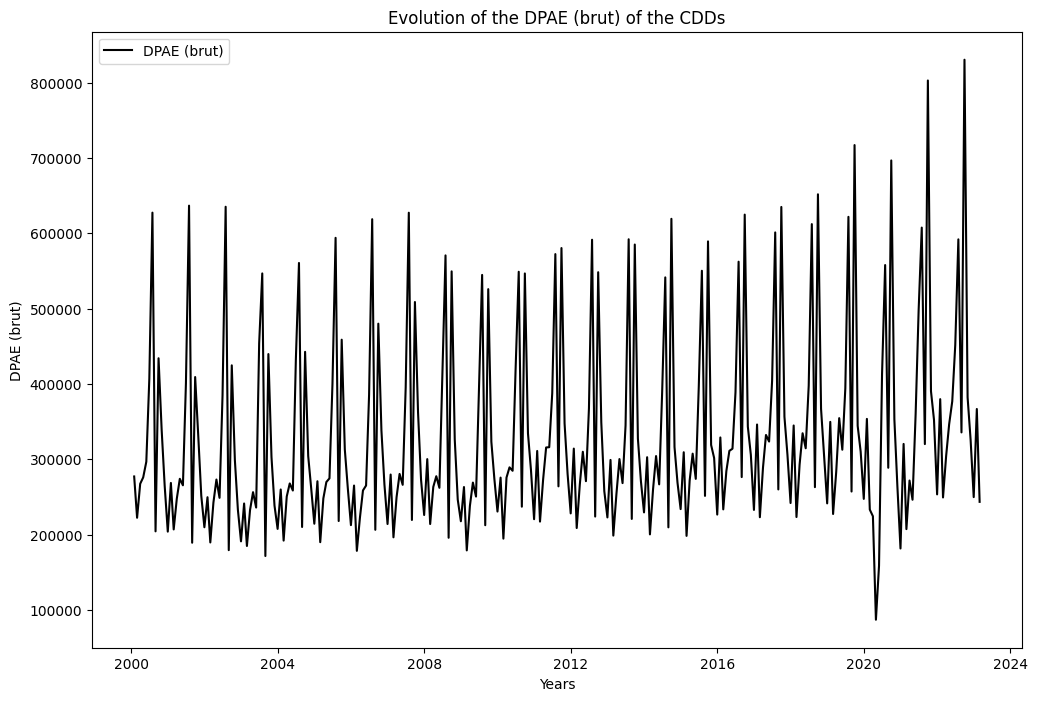

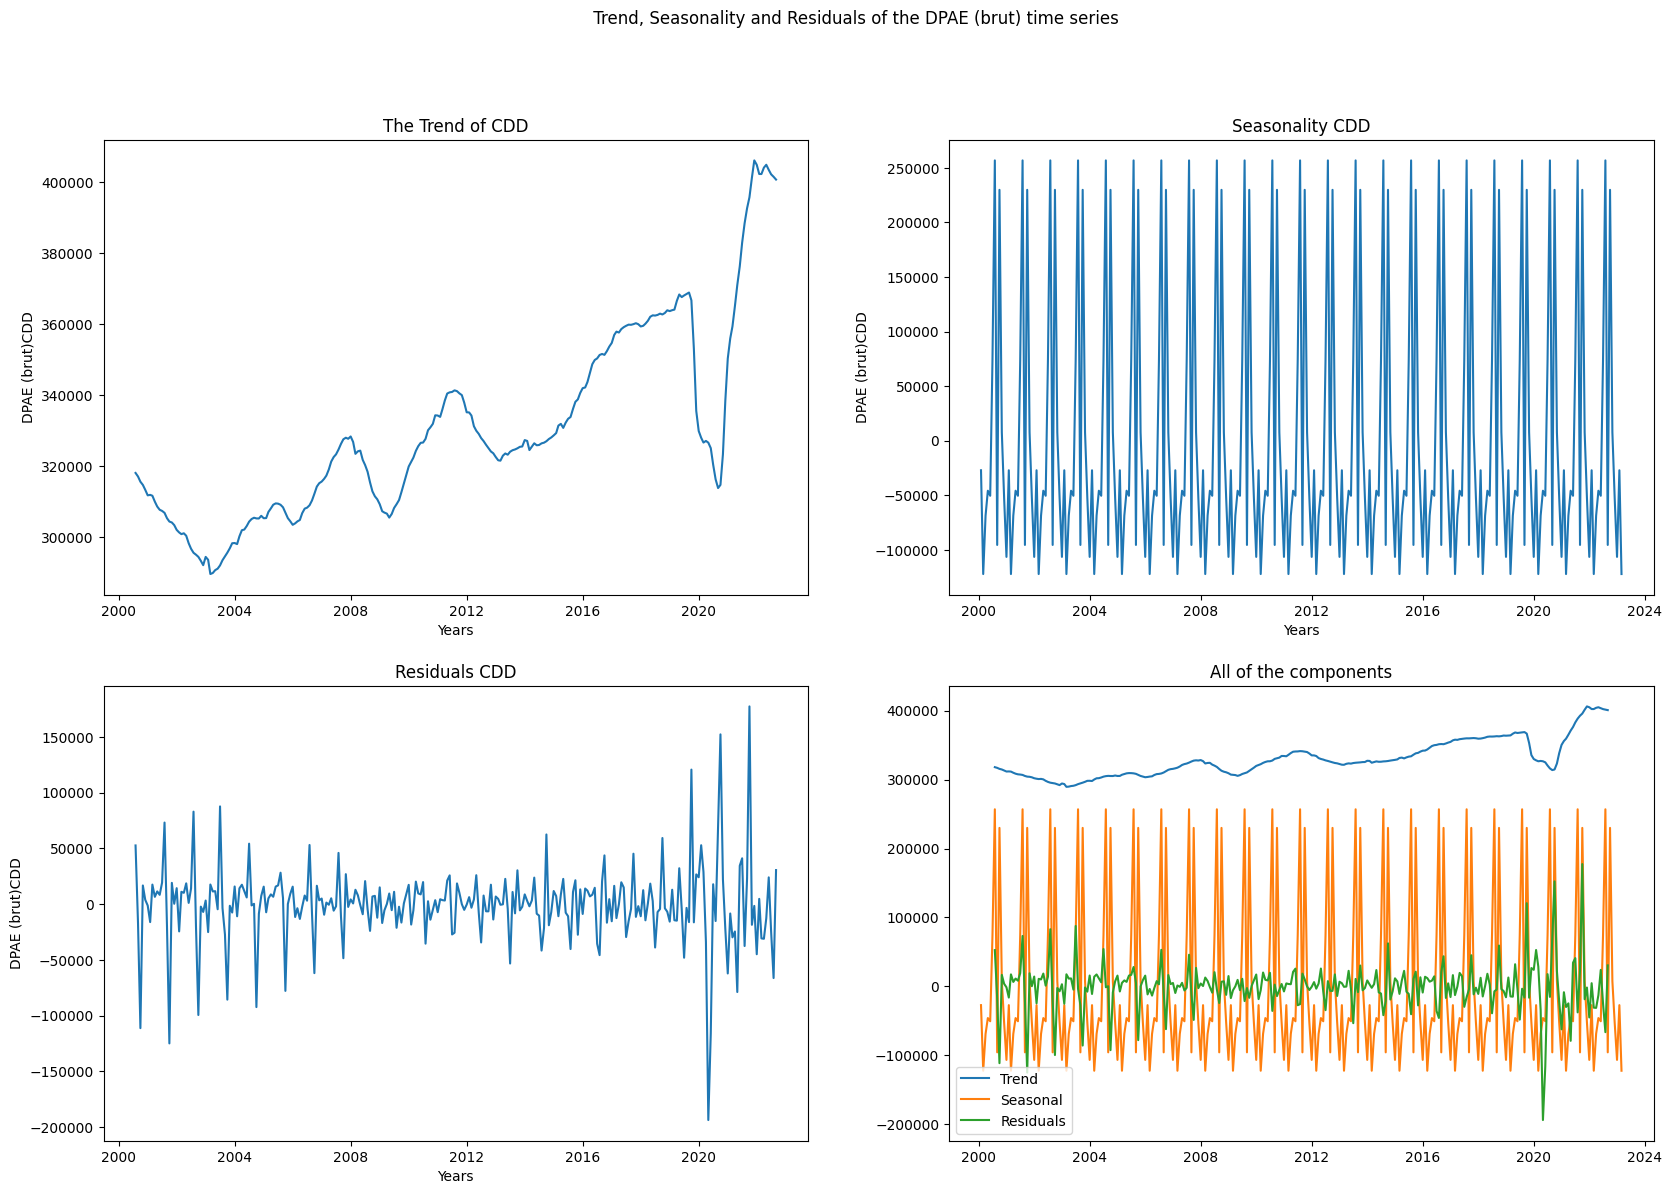

In [ ]:
seasonal_decomposition(dpae_data_cdd, "DPAE (brut)", 12, "Evolution of the DPAE (brut) of the CDDs", "CDD")

### For CDD

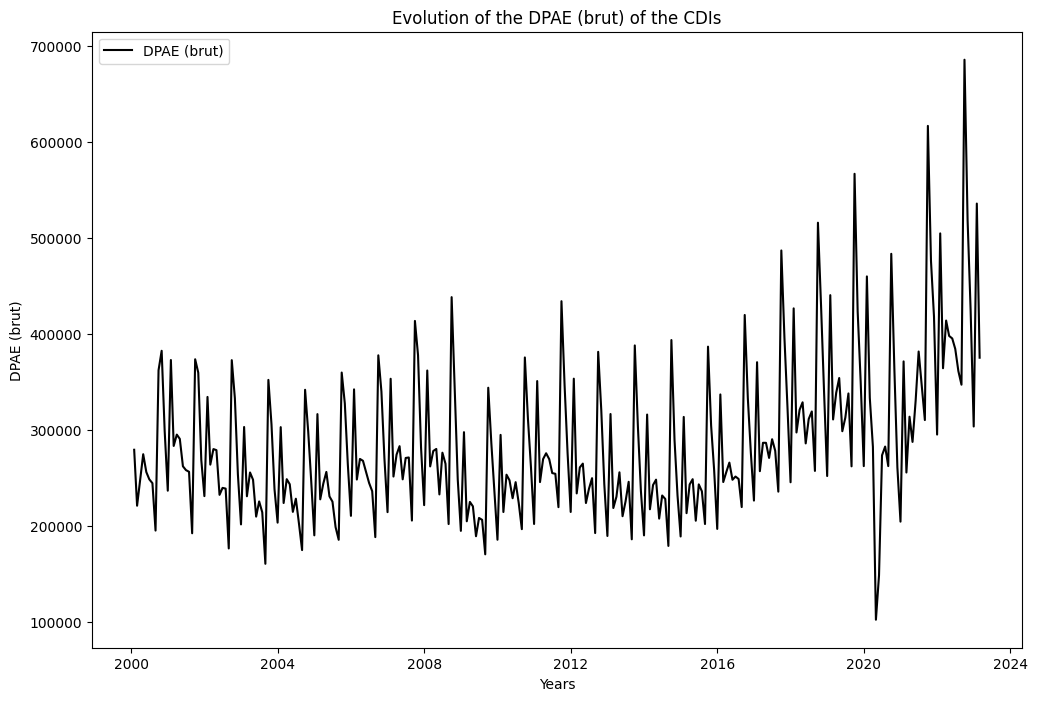

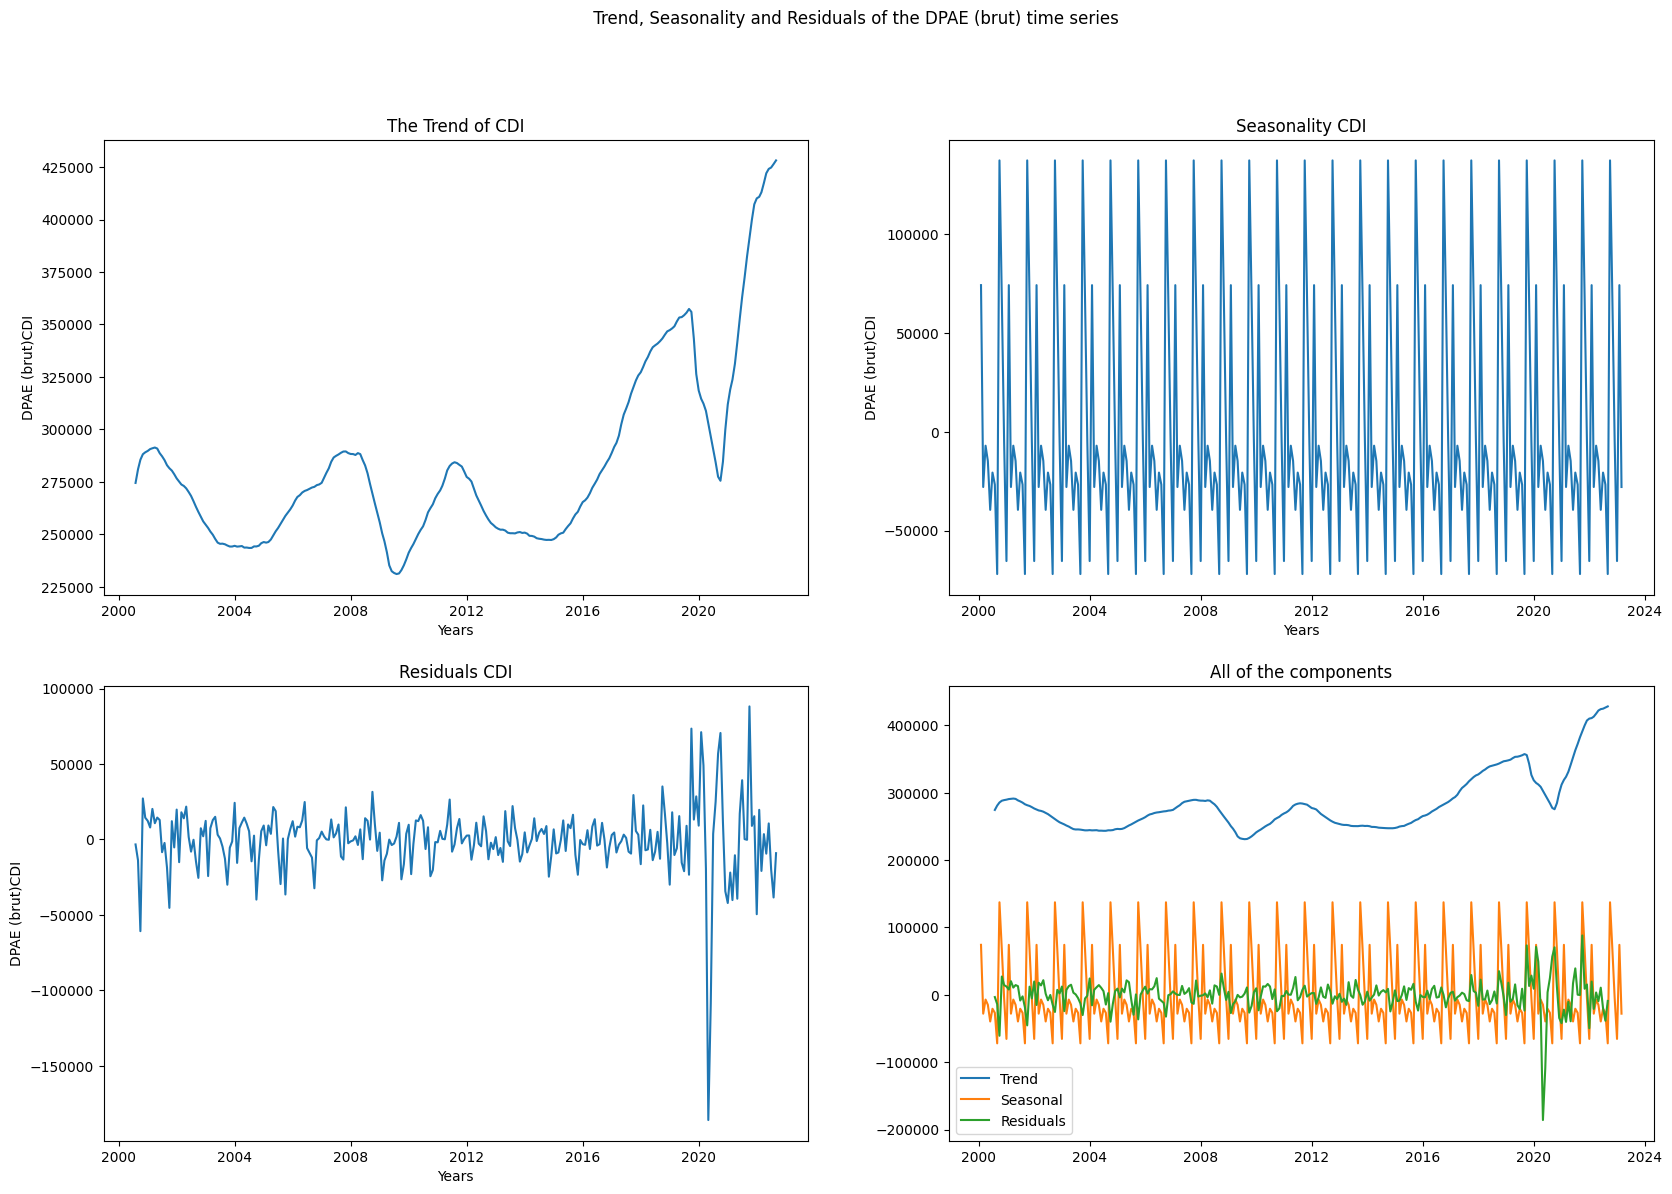

In [ ]:
seasonal_decomposition(dpae_data_cdi, "DPAE (brut)", 12, "Evolution of the DPAE (brut) of the CDIs", "CDI")

## I- EESSAE DATA

Let's take sector one that we already used in the previous part.

### Sector 1

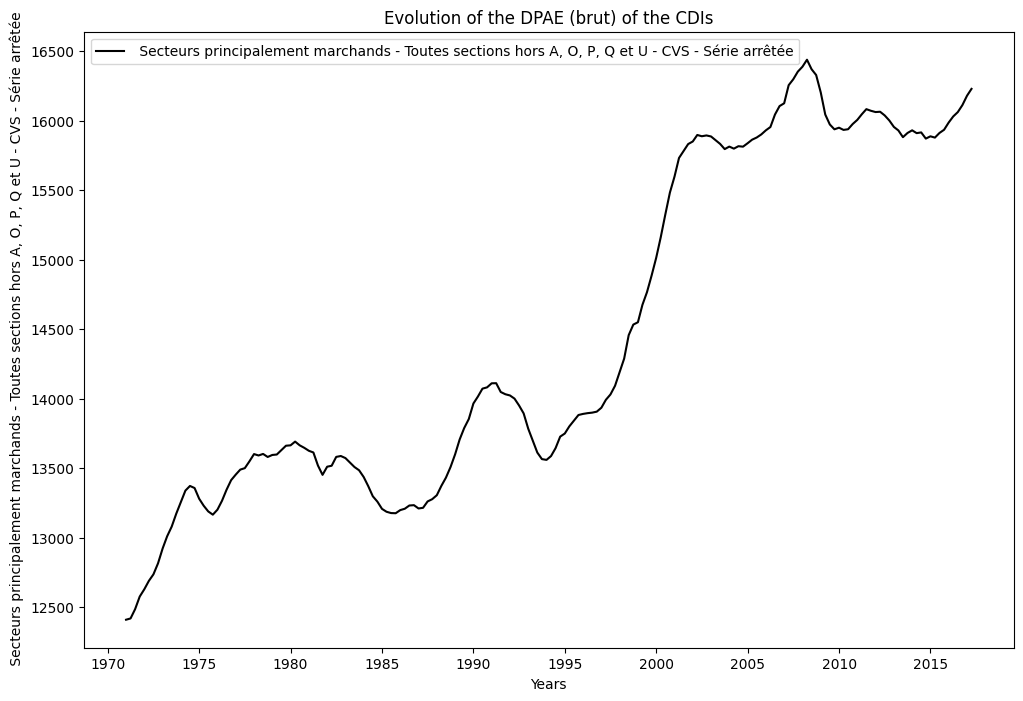

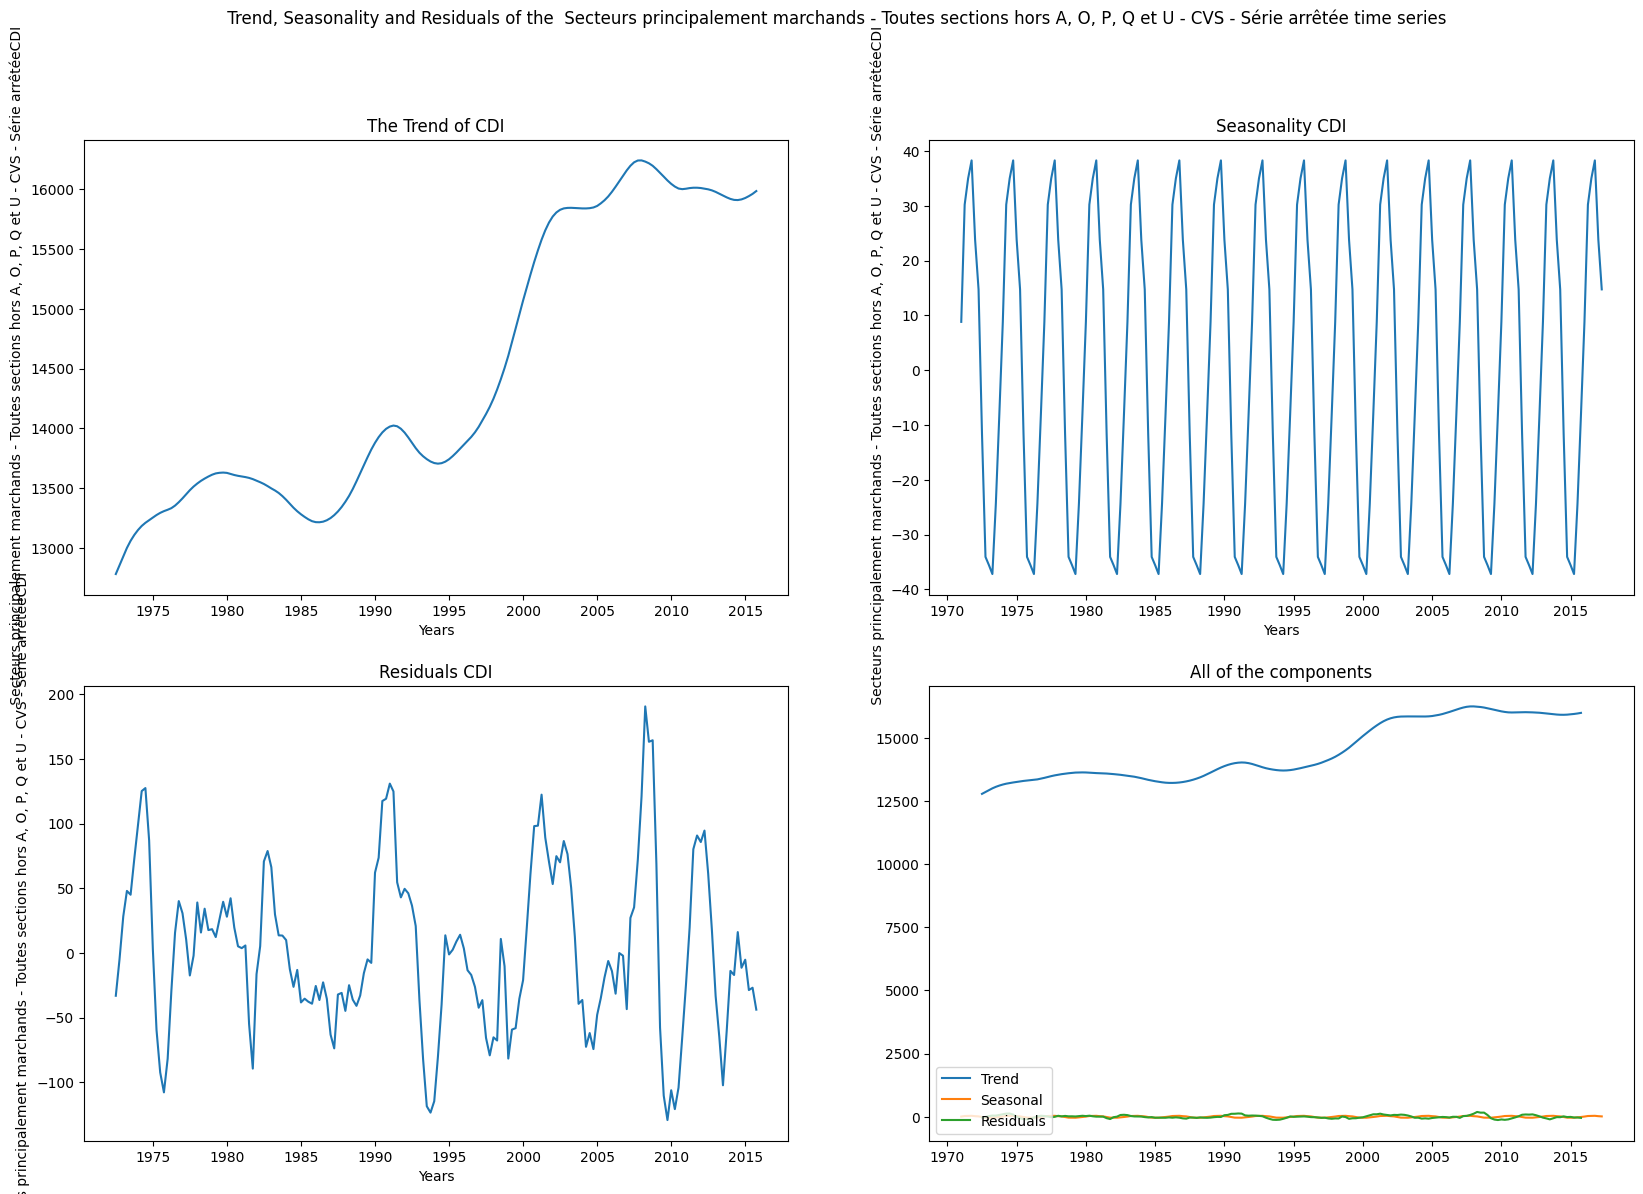

In [ ]:
eessa_dataSector1 = eessa_data.dropna(subset=[' Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'])

seasonal_decomposition(eessa_dataSector1, ' Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée', 12, "Evolution of the DPAE (brut) of the CDIs", "CDI")


Text(0.5, 1.0, 'Autocorrelation curve for DPAE brut (sector 1 : Marchand)')

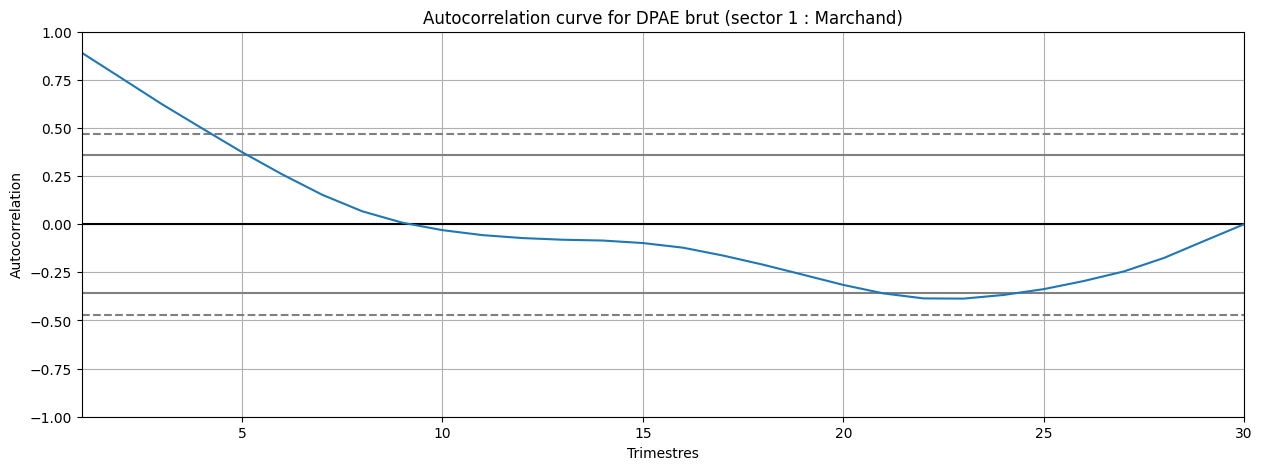

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(eessa_dataSector1[' Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'].iloc[0:30])
plt.xlabel("Trimestres")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation curve for DPAE brut (sector 1 : Marchand)")


### Sector 2

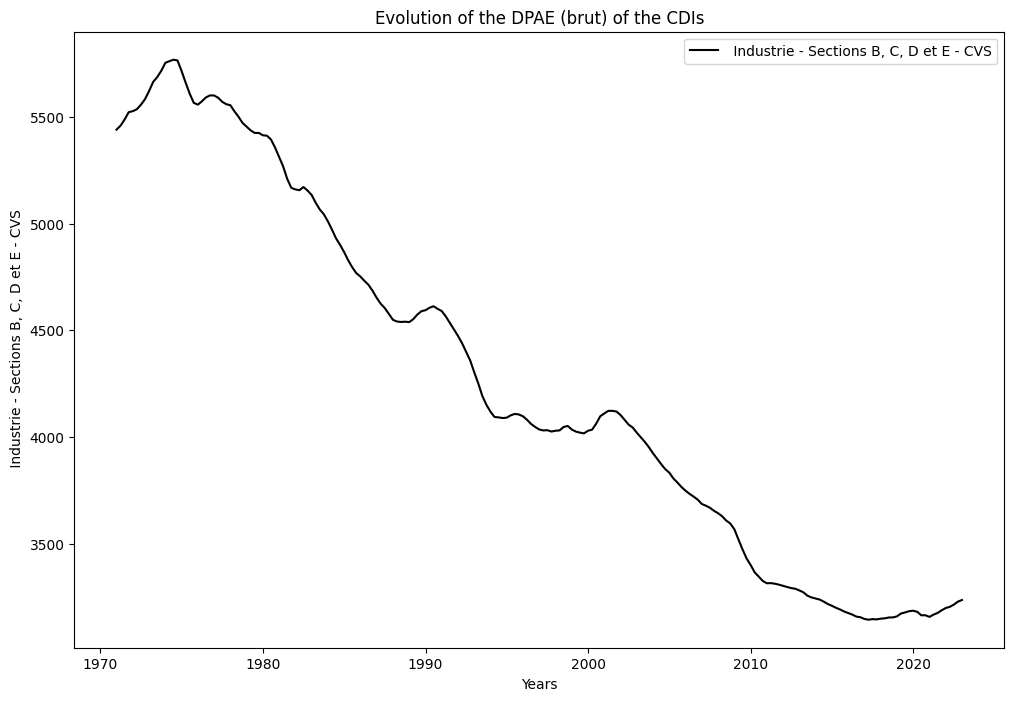

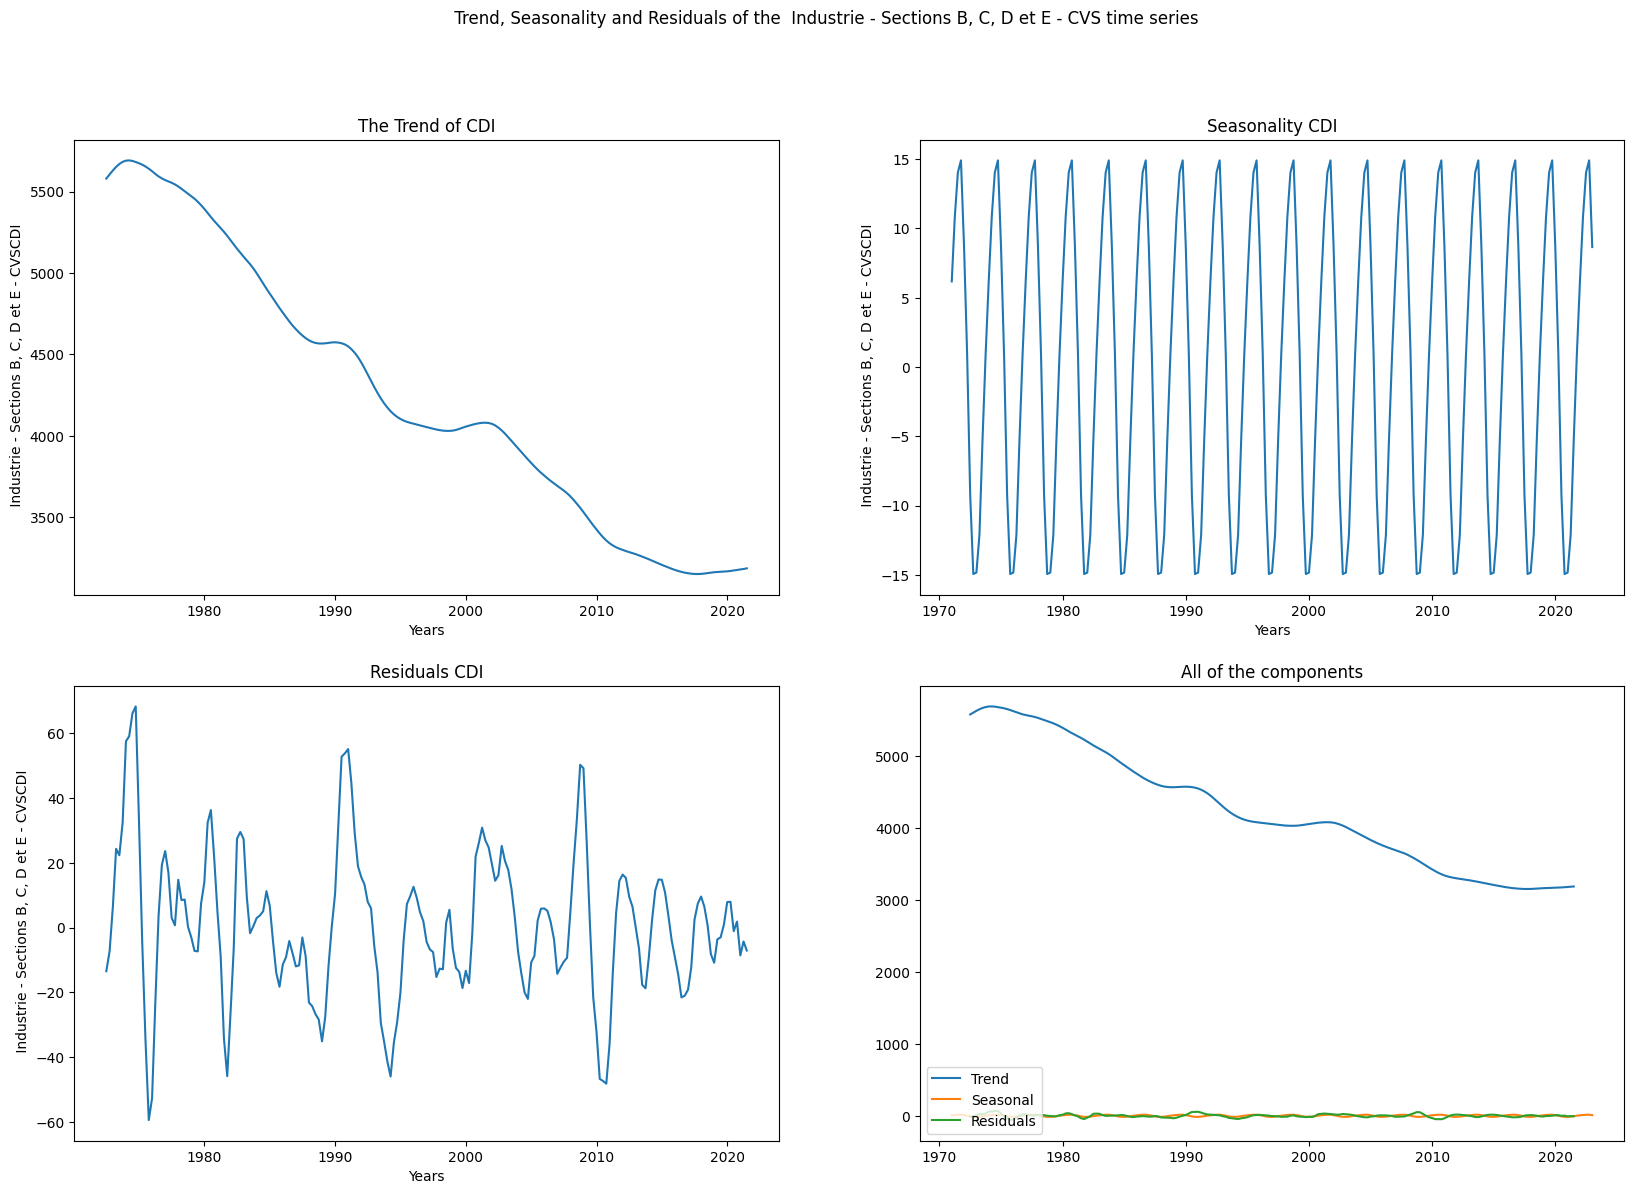

In [ ]:
eessa_dataSector2 = eessa_data.dropna(subset=[' Industrie - Sections B, C, D et E - CVS'])

seasonal_decomposition(eessa_dataSector2, ' Industrie - Sections B, C, D et E - CVS', 12, "Evolution of the DPAE (brut) of the CDIs", "CDI")


Text(0.5, 1.0, 'Autocorrelation curve of the DPAE brut of the sector Industrie - Sections B, C, D et E - CVS')

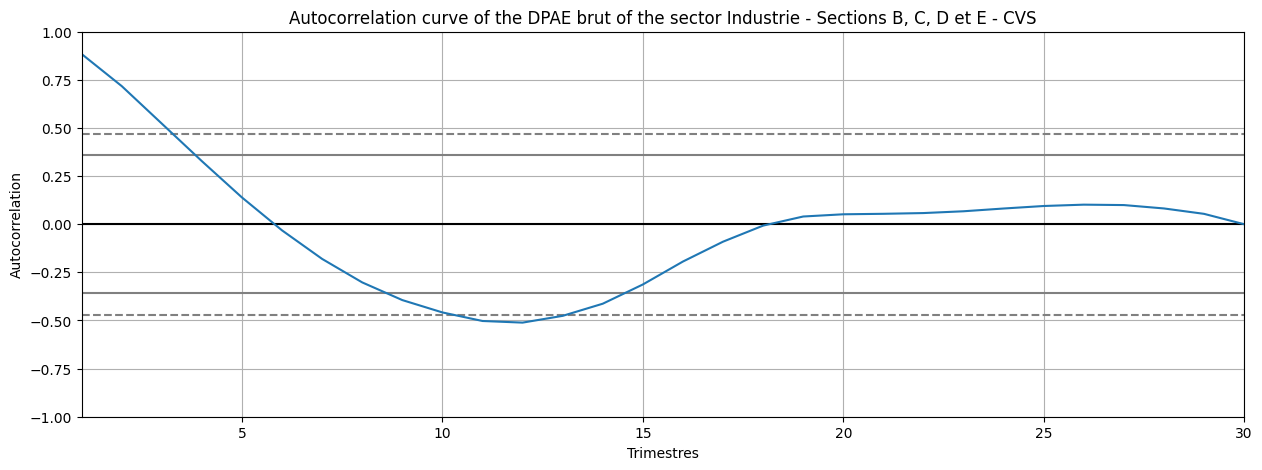

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(eessa_dataSector2[' Industrie - Sections B, C, D et E - CVS'].iloc[0:30])
plt.xlabel("Trimestres")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation curve of the DPAE brut of the sector Industrie - Sections B, C, D et E - CVS")


# Question 3 : prédiction par lissage exponentiel 

## 3.1 DPAE Data

# 3.1.1 Pour CDI

#### Data splitting

In [ ]:
train_dpae_data_cdi = dpae_data_cdi.iloc[:int(dpae_data_cdi.shape[0]*0.8),:]
test_dpae_data_cdi = dpae_data_cdi.iloc[int(dpae_data_cdi.shape[0]*0.8):,:]

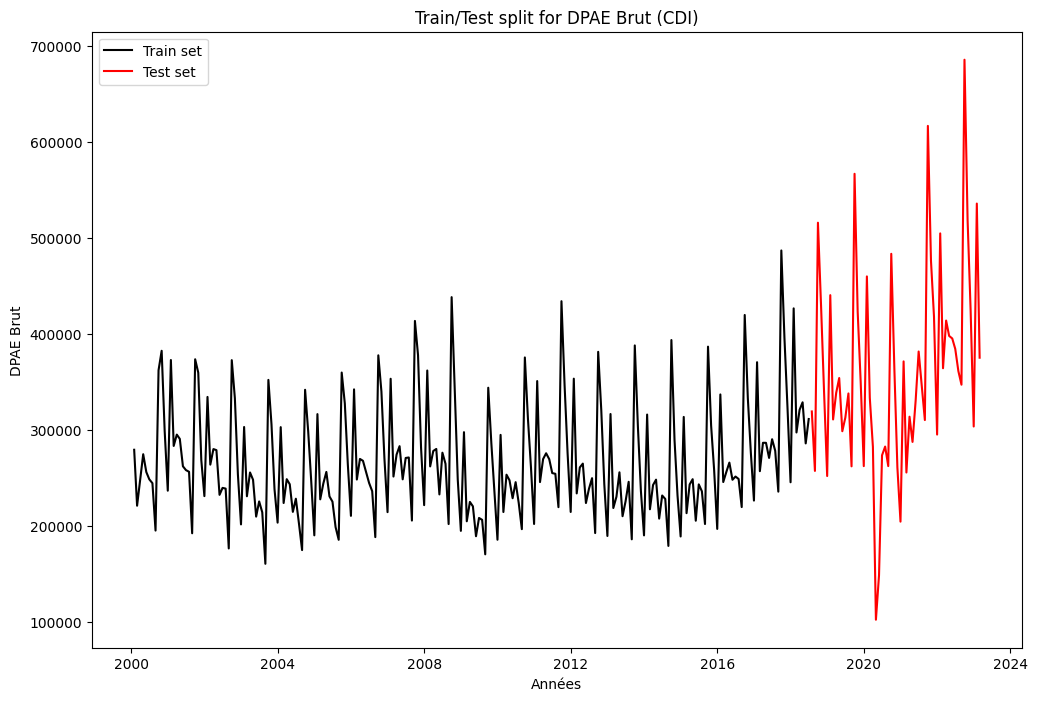

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(train_dpae_data_cdi["DPAE (brut)"], color = "black", label = "Train set")
plt.plot(test_dpae_data_cdi["DPAE (brut)"], color = "red", label = "Test set")
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Train/Test split for DPAE Brut (CDI)")
plt.legend(loc = "best")
plt.show()


#### Lissage

In [ ]:
train_dpae_data_cdi_expLis = train_dpae_data_cdi["DPAE (brut)"].values.tolist()
simpleExp_CDI = SimpleExpSmoothing(train_dpae_data_cdi_expLis,initialization_method = 'estimated').fit()
simpleExp_CDI.params_formatted # alpha = 0.1

forecast_values_CDI_expLis = simpleExp_CDI.forecast(test_dpae_data_cdi.shape[0]) #We will predict the next 53 months
forecast_values_CDI_expLis

/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


array([311704.70755799, 311704.70755799, 311704.70755799, 311704.70755799,
       311704.70755799, 311704.70755799, 311704.70755799, 311704.70755799,
       311704.70755799, 311704.70755799, 311704.70755799, 311704.70755799,
       311704.70755799, 311704.70755799, 311704.70755799, 311704.70755799,
       311704.70755799, 311704.70755799, 311704.70755799, 311704.70755799,
       311704.70755799, 311704.70755799, 311704.70755799, 311704.70755799,
       311704.70755799, 311704.70755799, 311704.70755799, 311704.70755799,
       311704.70755799, 311704.70755799, 311704.70755799, 311704.70755799,
       311704.70755799, 311704.70755799, 311704.70755799, 311704.70755799,
       311704.70755799, 311704.70755799, 311704.70755799, 311704.70755799,
       311704.70755799, 311704.70755799, 311704.70755799, 311704.70755799,
       311704.70755799, 311704.70755799, 311704.70755799, 311704.70755799,
       311704.70755799, 311704.70755799, 311704.70755799, 311704.70755799,
       311704.70755799, 3

#### Visualization

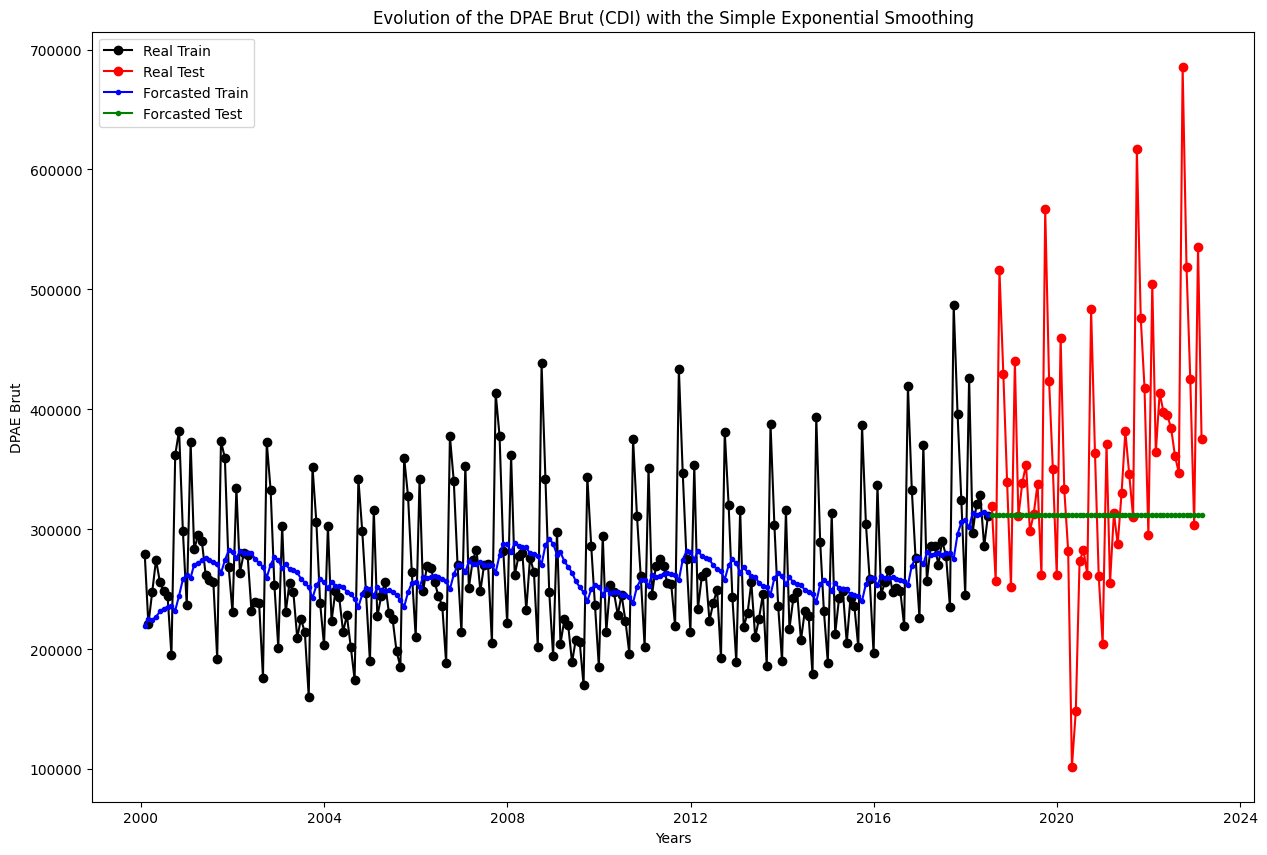

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(train_dpae_data_cdi.index,train_dpae_data_cdi_expLis, marker="o", color="black", label='Real Train')
plt.plot(test_dpae_data_cdi.index, test_dpae_data_cdi["DPAE (brut)"], marker="o", color = "red", label = 'Real Test')
plt.plot(train_dpae_data_cdi.index,simpleExp_CDI.fittedvalues, marker=".", color="blue", label='Forcasted Train')
plt.plot(test_dpae_data_cdi.index,forecast_values_CDI_expLis, marker=".", color = "green", label = 'Forcasted Test')
plt.ylabel("DPAE Brut")
plt.xlabel("Years")
plt.title("Evolution of the DPAE Brut (CDI) with the Simple Exponential Smoothing")
plt.legend(loc='best')
plt.show()

# 3.1.2 Pour CDD

#### Data splitting

In [ ]:
train_dpae_data_cdd = dpae_data_cdd.iloc[:int(dpae_data_cdd.shape[0]*0.8),:]
test_dpae_data_cdd = dpae_data_cdd.iloc[int(dpae_data_cdd.shape[0]*0.8):,:]

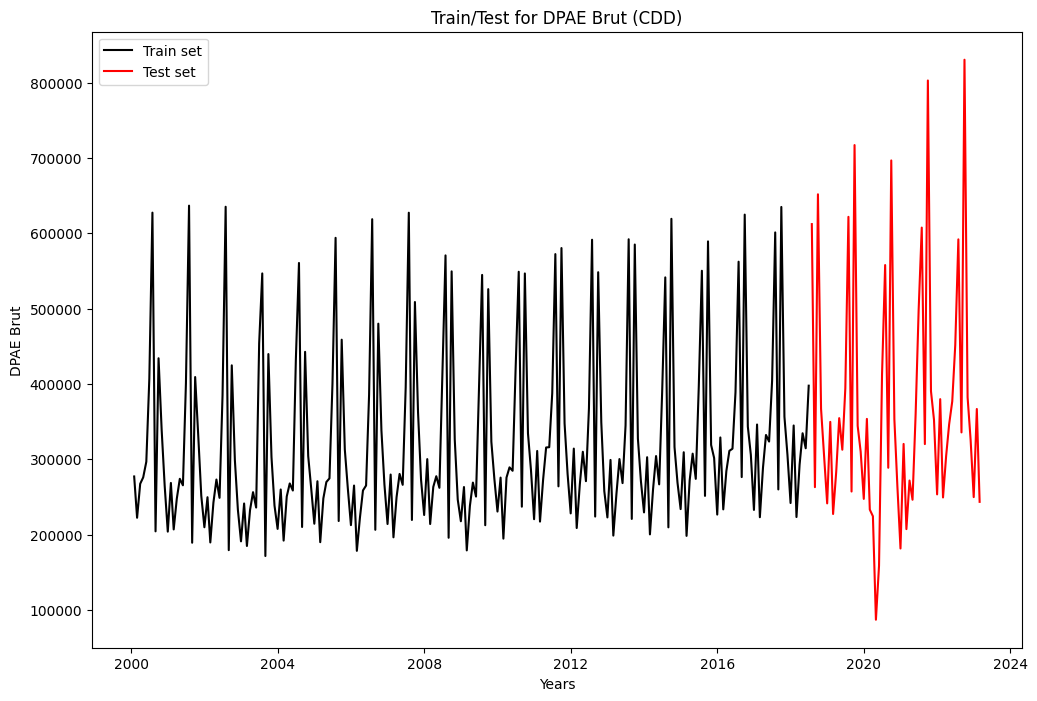

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(train_dpae_data_cdd["DPAE (brut)"], color = "black", label = "Train set")
plt.plot(test_dpae_data_cdd["DPAE (brut)"], color = "red", label = "Test set")
plt.ylabel("DPAE Brut")
plt.xlabel("Years")
plt.title("Train/Test for DPAE Brut (CDD)")
plt.legend(loc = "best")
plt.show()

#### Lisssage

In [ ]:
train_dpae_data_cdd_expLis = train_dpae_data_cdd["DPAE (brut)"].values.tolist()
simpleExp_CDD = SimpleExpSmoothing(train_dpae_data_cdd_expLis,initialization_method = 'estimated').fit()
simpleExp_CDD.params_formatted # alpha = 0.1

forecast_values_CDD_expLis = simpleExp_CDD.forecast(test_dpae_data_cdd.shape[0]) #We will predict the next 53 months
forecast_values_CDD_expLis

/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


array([339352.57986728, 339352.57986728, 339352.57986728, 339352.57986728,
       339352.57986728, 339352.57986728, 339352.57986728, 339352.57986728,
       339352.57986728, 339352.57986728, 339352.57986728, 339352.57986728,
       339352.57986728, 339352.57986728, 339352.57986728, 339352.57986728,
       339352.57986728, 339352.57986728, 339352.57986728, 339352.57986728,
       339352.57986728, 339352.57986728, 339352.57986728, 339352.57986728,
       339352.57986728, 339352.57986728, 339352.57986728, 339352.57986728,
       339352.57986728, 339352.57986728, 339352.57986728, 339352.57986728,
       339352.57986728, 339352.57986728, 339352.57986728, 339352.57986728,
       339352.57986728, 339352.57986728, 339352.57986728, 339352.57986728,
       339352.57986728, 339352.57986728, 339352.57986728, 339352.57986728,
       339352.57986728, 339352.57986728, 339352.57986728, 339352.57986728,
       339352.57986728, 339352.57986728, 339352.57986728, 339352.57986728,
       339352.57986728, 3

#### Visualization

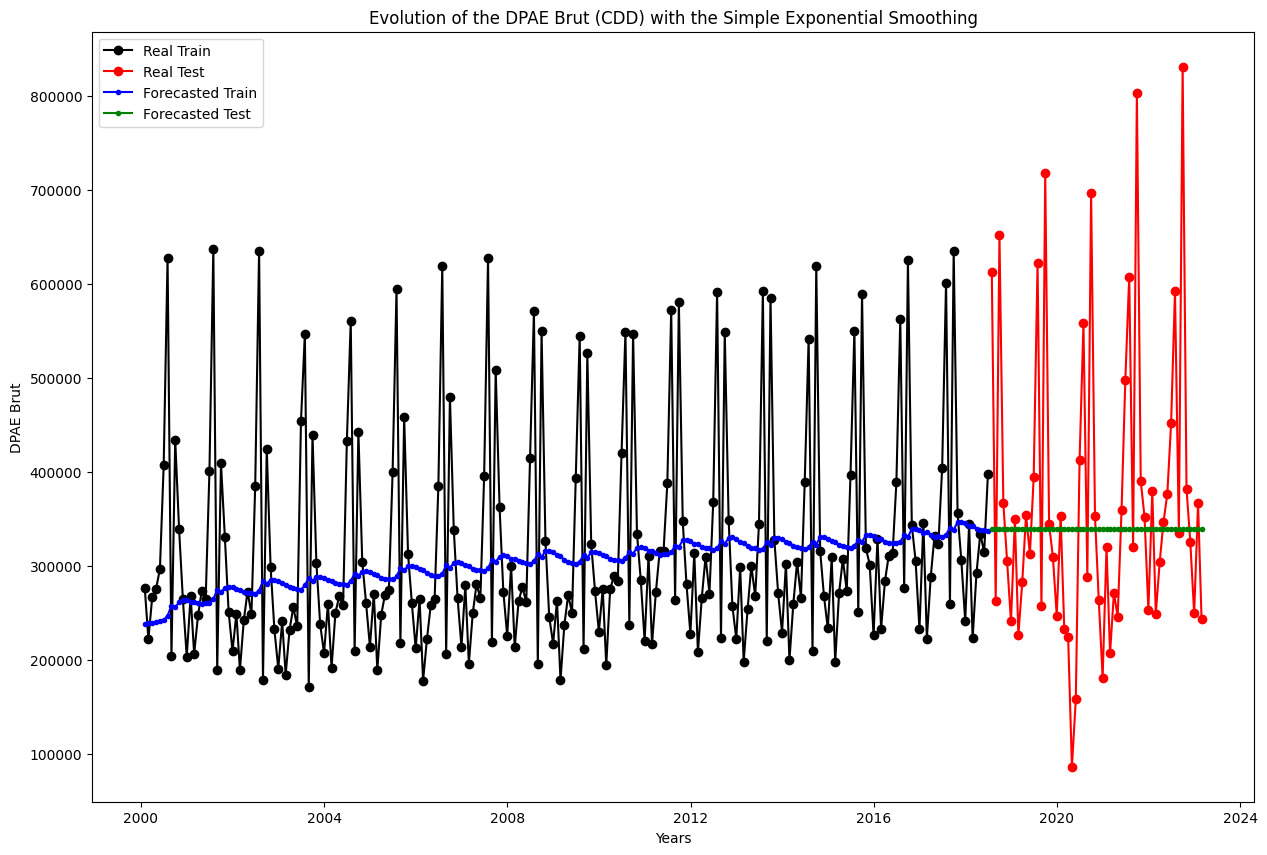

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(train_dpae_data_cdd.index,train_dpae_data_cdd_expLis, marker="o", color="black", label='Real Train')
plt.plot(test_dpae_data_cdd.index, test_dpae_data_cdd["DPAE (brut)"], marker="o", color = "red", label = 'Real Test')
plt.plot(train_dpae_data_cdd.index,simpleExp_CDD.fittedvalues, marker=".", color="blue", label='Forecasted Train')
plt.plot(test_dpae_data_cdd.index,forecast_values_CDD_expLis, marker=".", color = "green", label = 'Forecasted Test')
plt.ylabel("DPAE Brut")
plt.xlabel("Years")
plt.title("Evolution of the DPAE Brut (CDD) with the Simple Exponential Smoothing")
plt.legend(loc='best')
plt.show()

## 3.1 EESSA data

#### Sector 1 : 

#### Data splitting

In [ ]:
train_ratio = 0.8 
test_ratio = 1 - train_ratio
train_index_eessa_dataSector1 = int(np.floor(train_ratio * len(eessa_dataSector1)))
# - ' Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée',
# - ' Industrie - Sections B, C, D et E - CVS',

train_set_eessa_dataSector1 = eessa_dataSector1.iloc[0:train_index_eessa_dataSector1]
test_set_eessa_dataSector1 = eessa_dataSector1.iloc[train_index_eessa_dataSector1:]
train_set_eessa_dataSector1_expLis = train_set_eessa_dataSector1[' Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'].values 
test_set_eessa_dataSector1_expLis = test_set_eessa_dataSector1[' Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'].values 

#### Predictions

In [ ]:
simpleExp_eessa_dataSector1 = SimpleExpSmoothing(train_set_eessa_dataSector1_expLis,initialization_method = 'heuristic')
alpha = 0.1
model_eessa_dataSector1 = simpleExp_eessa_dataSector1.fit(smoothing_level = alpha, optimized = False)
forecast_values_eessa_dataSector1 = model_eessa_dataSector1.forecast(test_set_eessa_dataSector1_expLis.shape[0]) 
forecast_values_eessa_dataSector1

array([15963.28050427, 15963.28050427, 15963.28050427, 15963.28050427,
       15963.28050427, 15963.28050427, 15963.28050427, 15963.28050427,
       15963.28050427, 15963.28050427, 15963.28050427, 15963.28050427,
       15963.28050427, 15963.28050427, 15963.28050427, 15963.28050427,
       15963.28050427, 15963.28050427, 15963.28050427, 15963.28050427,
       15963.28050427, 15963.28050427, 15963.28050427, 15963.28050427,
       15963.28050427, 15963.28050427, 15963.28050427, 15963.28050427,
       15963.28050427, 15963.28050427, 15963.28050427, 15963.28050427,
       15963.28050427, 15963.28050427, 15963.28050427, 15963.28050427,
       15963.28050427, 15963.28050427])

#### Data visualization

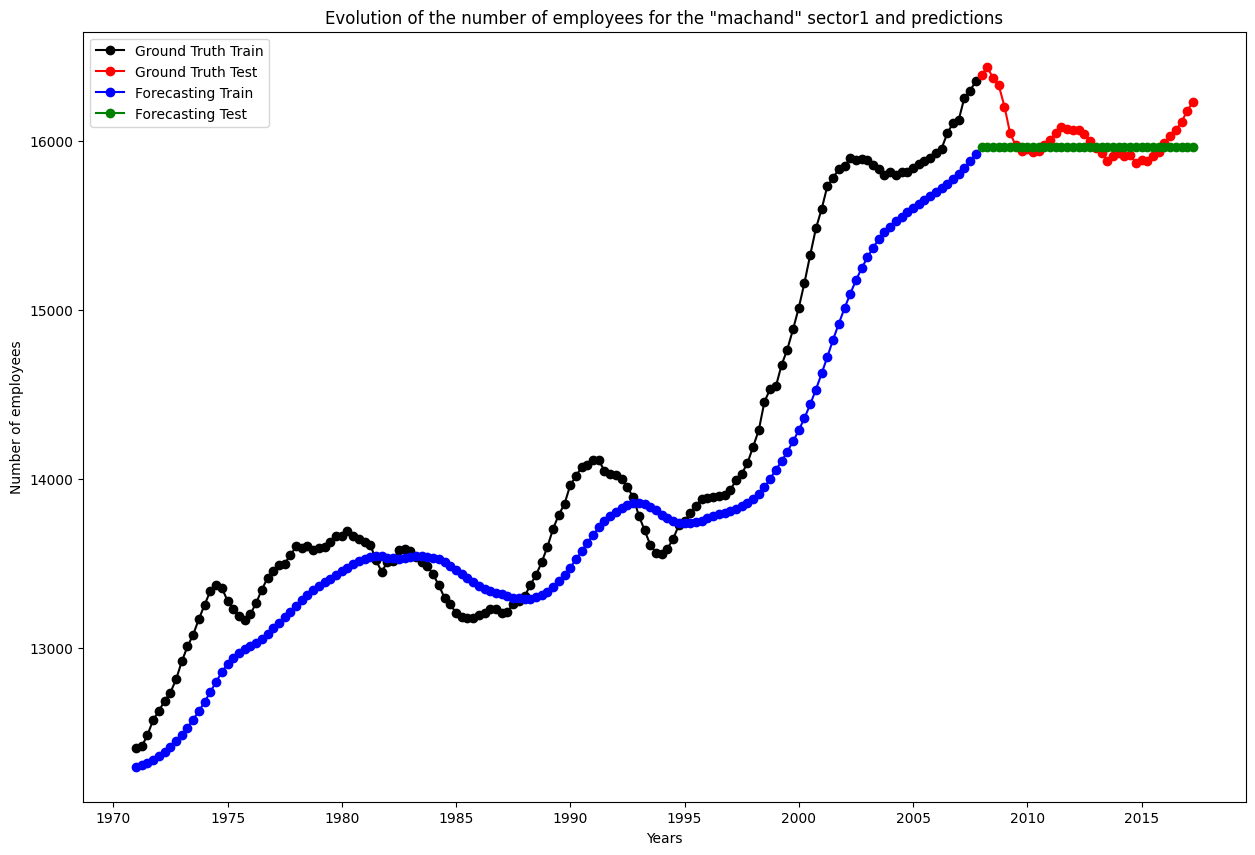

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(train_set_eessa_dataSector1.index, train_set_eessa_dataSector1_expLis, marker="o", color="black", label='Ground Truth Train')
plt.plot(test_set_eessa_dataSector1.index, test_set_eessa_dataSector1_expLis, marker="o", color="red", label='Ground Truth Test')
plt.plot(train_set_eessa_dataSector1.index, model_eessa_dataSector1.fittedvalues, marker="o", color="blue", label='Forecasting Train')
plt.plot(test_set_eessa_dataSector1.index, forecast_values_eessa_dataSector1, marker="o", color="green", label='Forecasting Test')
plt.ylabel("Number of employees")
plt.xlabel("Years")
plt.title("Evolution of the number of employees for the \"machand\" sector1 and predictions")
plt.legend(loc='best')
plt.show()

#### Sector 2 :


#### data splitting

In [ ]:
train_index_eessa_dataSector2 = int(np.floor(train_ratio * len(eessa_dataSector2)))
train_set_eessa_dataSector2 = eessa_dataSector2.iloc[0:train_index_eessa_dataSector2]
test_set_eessa_dataSector2 = eessa_dataSector2.iloc[train_index_eessa_dataSector2:]
train_set_eessa_dataSector2_expLis = train_set_eessa_dataSector2[' Industrie - Sections B, C, D et E - CVS'].values 
test_set_eessa_dataSector2_expLis = test_set_eessa_dataSector2[' Industrie - Sections B, C, D et E - CVS'].values 

#### predictions

In [ ]:
simpleExp_eessa_dataSector2 = SimpleExpSmoothing(train_set_eessa_dataSector2_expLis,initialization_method = 'heuristic')
alpha = 0.1
model_eessa_dataSector2 = simpleExp_eessa_dataSector2.fit(smoothing_level = alpha, optimized = False)
forecast_values_eessa_dataSector2 = model_eessa_dataSector2.forecast(test_set_eessa_dataSector2_expLis.shape[0]) 
forecast_values_eessa_dataSector2

array([3420.61448834, 3420.61448834, 3420.61448834, 3420.61448834,
       3420.61448834, 3420.61448834, 3420.61448834, 3420.61448834,
       3420.61448834, 3420.61448834, 3420.61448834, 3420.61448834,
       3420.61448834, 3420.61448834, 3420.61448834, 3420.61448834,
       3420.61448834, 3420.61448834, 3420.61448834, 3420.61448834,
       3420.61448834, 3420.61448834, 3420.61448834, 3420.61448834,
       3420.61448834, 3420.61448834, 3420.61448834, 3420.61448834,
       3420.61448834, 3420.61448834, 3420.61448834, 3420.61448834,
       3420.61448834, 3420.61448834, 3420.61448834, 3420.61448834,
       3420.61448834, 3420.61448834, 3420.61448834, 3420.61448834,
       3420.61448834, 3420.61448834])

#### visualizations

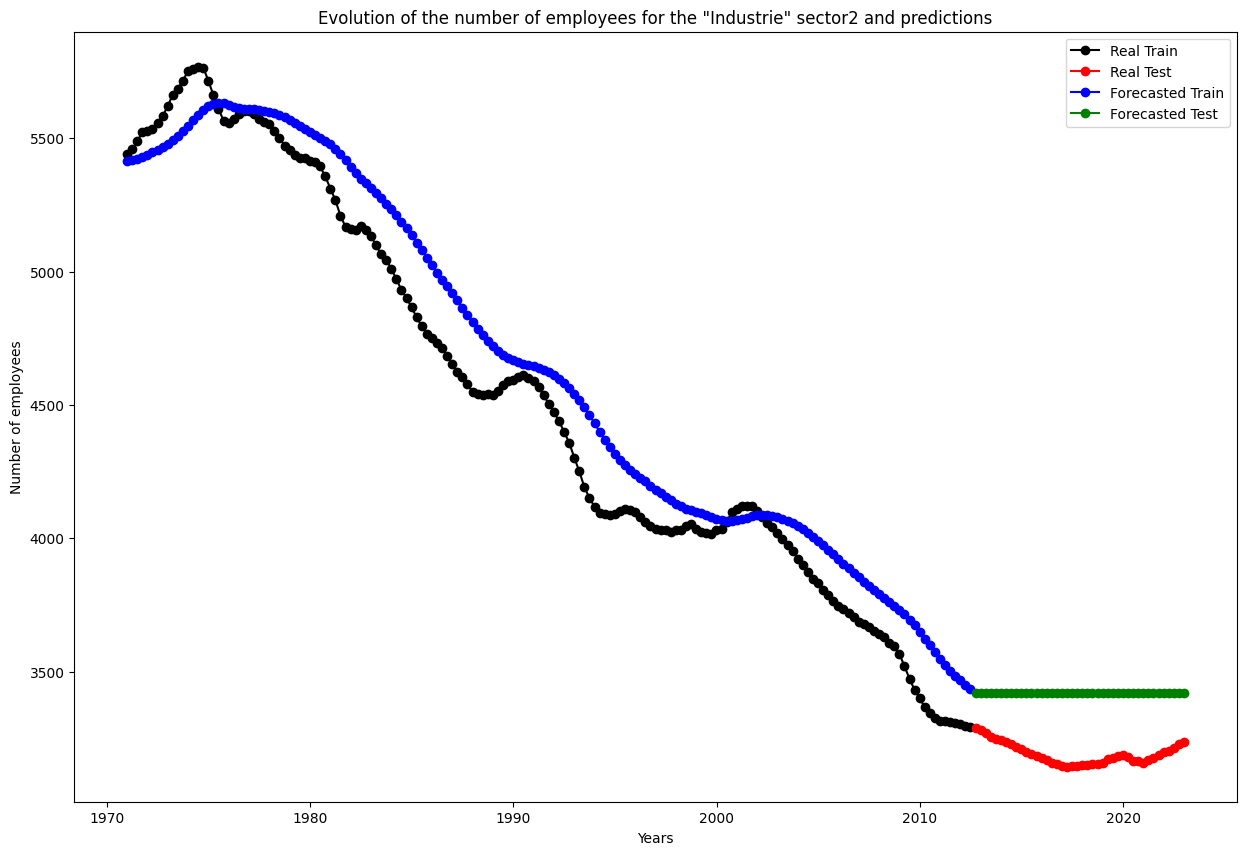

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(train_set_eessa_dataSector2.index, train_set_eessa_dataSector2_expLis, marker="o", color="black", label='Real Train')
plt.plot(test_set_eessa_dataSector2.index, test_set_eessa_dataSector2_expLis, marker="o", color="red", label='Real Test')
plt.plot(train_set_eessa_dataSector2.index, model_eessa_dataSector2.fittedvalues, marker="o", color="blue", label='Forecasted Train')
plt.plot(test_set_eessa_dataSector2.index, forecast_values_eessa_dataSector2, marker="o", color="green", label='Forecasted Test')
plt.ylabel("Number of employees")
plt.xlabel("Years")
plt.title("Evolution of the number of employees for the \"Industrie\" sector2 and predictions")
plt.legend(loc='best')
plt.show()

# Question 4 : Evaluation de la prédiction de notre modèle

## DPAE DATA

In [ ]:
rmse_expLis_CDD = np.sqrt(mean_squared_error(test_dpae_data_cdd["DPAE (brut)"], forecast_values_CDD_expLis))
print("RMSE for CDDs : ",rmse_expLis_CDD)

rmse_expLis_CDI = np.sqrt(mean_squared_error(test_dpae_data_cdi["DPAE (brut)"], forecast_values_CDI_expLis))
print("RMSE for CDIs: ",rmse_expLis_CDI)

RMSE for CDDs :  163017.89706584474
RMSE for CDIs:  118063.50285950792


## EESSA DATA

In [ ]:
rmse_expLi_eessa_dataSector1 = np.sqrt(mean_squared_error(test_set_eessa_dataSector1_expLis,forecast_values_eessa_dataSector1))
print("RMSE for sector1 'marchand' ",rmse_expLi_eessa_dataSector1)

rmse_expLi_eessa_dataSector2 = np.sqrt(mean_squared_error(test_set_eessa_dataSector2_expLis,forecast_values_eessa_dataSector2))
print("RMSE for sector2 'industrie':",rmse_expLi_eessa_dataSector2)

RMSE for sector1 'marchand'  164.0685712082974
RMSE for sector2 'industrie': 232.39212707255894


# Question 5 : Application et évaluation d’autres modèles de prédiction

## Model 1 : ARIMA

### DPAE DATA

#### --- For CDD

In [ ]:

# create a function for the above code 
def arima_model(test, test_explis, train_explis, column, order, typo):
    arima = ARIMA(train_explis, order = order)
    model_arima = arima.fit()
    if typo.lower() == "cdd" or typo.lower() == "cdi":
        forecast_values_arima = model_arima.get_forecast(len(test.index))
    else:
        forecast_values_arima = model_arima.get_forecast(test_explis.shape[0])
        
    forecast_values_arima_df = forecast_values_arima.conf_int(alpha = 0.05)
    forecast_values_arima_df = pd.DataFrame(forecast_values_arima_df)
    forecast_values_arima_df["Predictions"] = model_arima.predict(start = forecast_values_arima_df.index[0], end = forecast_values_arima_df.index[-1])
    
    if typo.lower() == "cdd" or typo.lower() == "cdi":
        forecast_values_arima_df.index = test.index
    else:
        forecast_values_arima_df.index = test[column].index
        
    predictions_arima = forecast_values_arima_df["Predictions"] 
    full_curve_arima = np.concatenate((model_arima.fittedvalues, forecast_values_arima_df["Predictions"]))
    return model_arima, predictions_arima, full_curve_arima

# plot the results of the ARIMA model
def plot_arima(train, test, train_explis, model_arima, predictions_arima, column):
    plt.figure(figsize = (15,10))
    plt.plot(train.index, train_explis, marker="o", color="black", label='Ground Truth Train')
    plt.plot(test.index, test[column], marker="o", color = "red", label = 'Ground Truth Test')
    plt.plot(train.index, model_arima.fittedvalues, marker=".", color="blue", label='Forecasting Train')
    plt.plot(test.index, predictions_arima, marker=".", color = "green", label = 'Forecasting Test')
    plt.ylabel(column)
    plt.xlabel("Years")
    plt.title("Evolution of the "+ column + " (CDD) with the ARIMA smothing")
    plt.legend(loc='best')
    plt.show()
    

# find the best parameters for the ARIMA model
def find_best_arima_model(test, test_explis, train_explis, column, typo):
    best_rmse = 10000000
    best_order = (0,0,0)
    for p in range(0, 7):
        for d in range(0, 5):
            for q in range(0, 7):
                try:
                    model_arima, predictions_arima, full_curve_arima = arima_model(test,test_explis, train_explis, column, (p,d,q), typo)
                    rmse = np.sqrt(mean_squared_error(test[column], predictions_arima))
                    if rmse < best_rmse:
                        best_rmse = rmse
                        best_order = (p,d,q)
                except:
                    continue
    return best_order, best_rmse, model_arima, predictions_arima, full_curve_arima


/home/amine/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/amine/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/amine/.local/lib/python3.10/site-packages/statsmodels/ts

Best order for CDDs :  (1, 0, 2)
Best RMSE for CDDs :  164147.3485282385


/home/amine/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


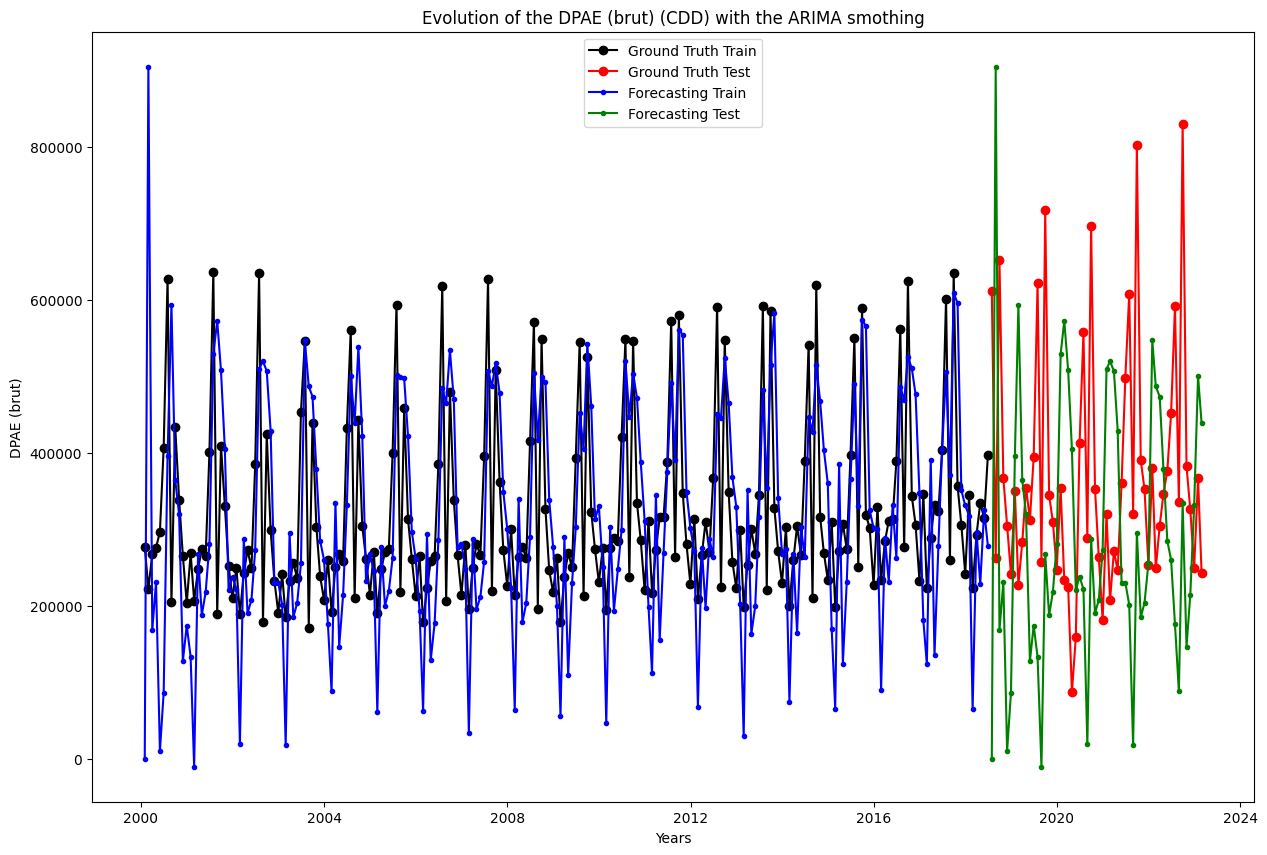

In [ ]:
# find the best parameters for the ARIMA model
best_arima_order_CDD, best_arima_rmse_CDD, model_arima_CDD, predictions_arima_CDD, full_curve_arima_CDD = find_best_arima_model(test_dpae_data_cdd, None, train_dpae_data_cdd_expLis, "DPAE (brut)" , "CDD")
print("Best order for CDDs : ", best_arima_order_CDD)
print("Best RMSE for CDDs : ", best_arima_rmse_CDD)


plot_arima(train_dpae_data_cdd, test_dpae_data_cdd, train_dpae_data_cdd_expLis, model_arima_CDD, predictions_arima_CDD, "DPAE (brut)")

#### ---For CDI
arima_CDD = ARIMA(df_train_CDD_ses, order = (12, 1, 9)) #(poids du passé, nb itération, poids du futur)


/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/amine/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/amine/.local/lib/python3.10/site-packages/stats

Best order for CDIs :  (1, 2, 3)
Best RMSE for CDIs :  139833.71519955786


/home/amine/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


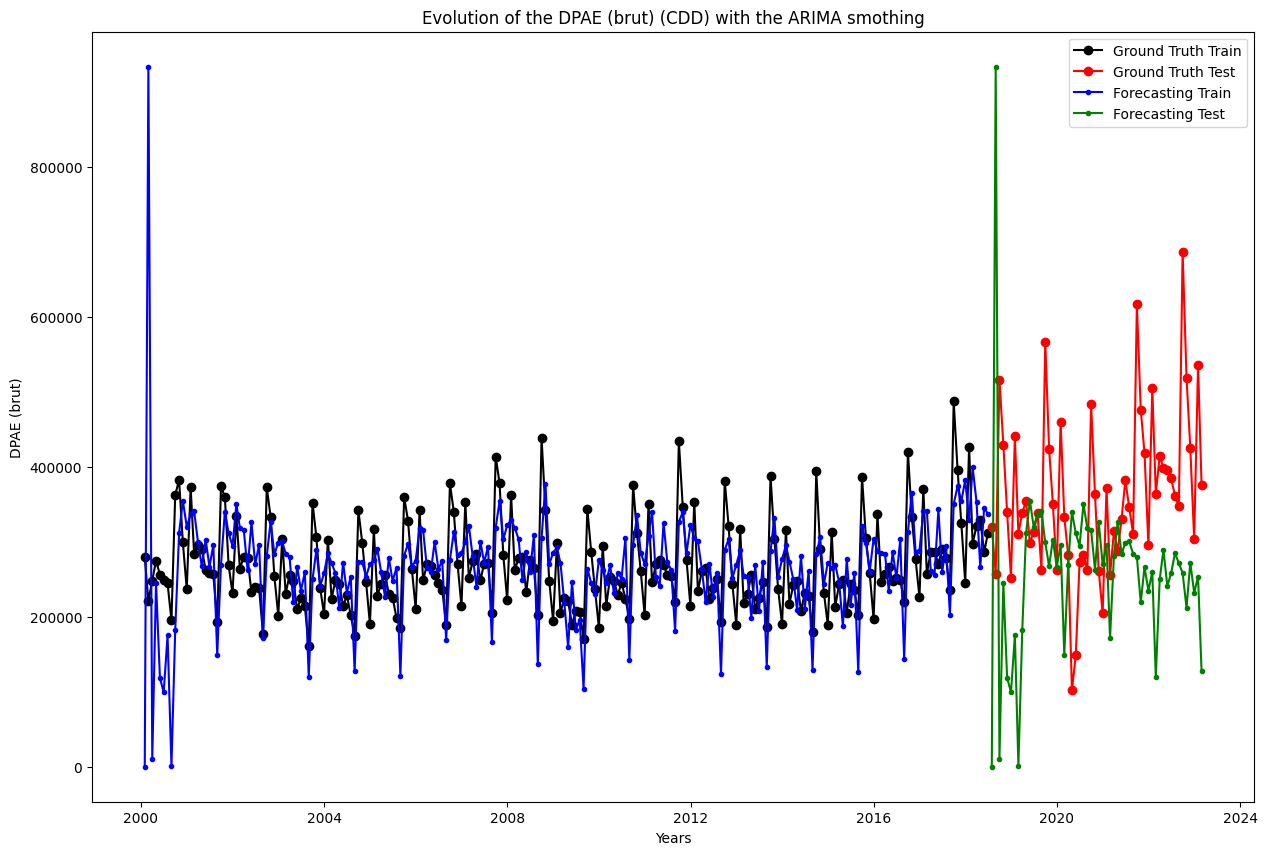

In [ ]:
# same for cdi 

best_arima_order_CDI, best_arima_rmse_CDI, model_arima_CDI, predictions_arima_CDI, full_curve_arima_CDI = find_best_arima_model(test_dpae_data_cdi, None, train_dpae_data_cdi_expLis, "DPAE (brut)","CDI")
print("Best order for CDIs : ", best_arima_order_CDI)
print("Best RMSE for CDIs : ", best_arima_rmse_CDI)

plot_arima(train_dpae_data_cdi, test_dpae_data_cdi, train_dpae_data_cdi_expLis, model_arima_CDI, predictions_arima_CDI, "DPAE (brut)")


## data EESSA


### Sector 1 : 

In [ ]:
train_set_eessa_dataSector1.columns[0]


' Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'

/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/amine/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/amine/.local/lib/python3.10/site-packages/stats

Best order for eessa_dataSector1 :  (0, 0, 0)
Best RMSE for eessa_dataSector1 :  1985.1209741955925


/home/amine/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


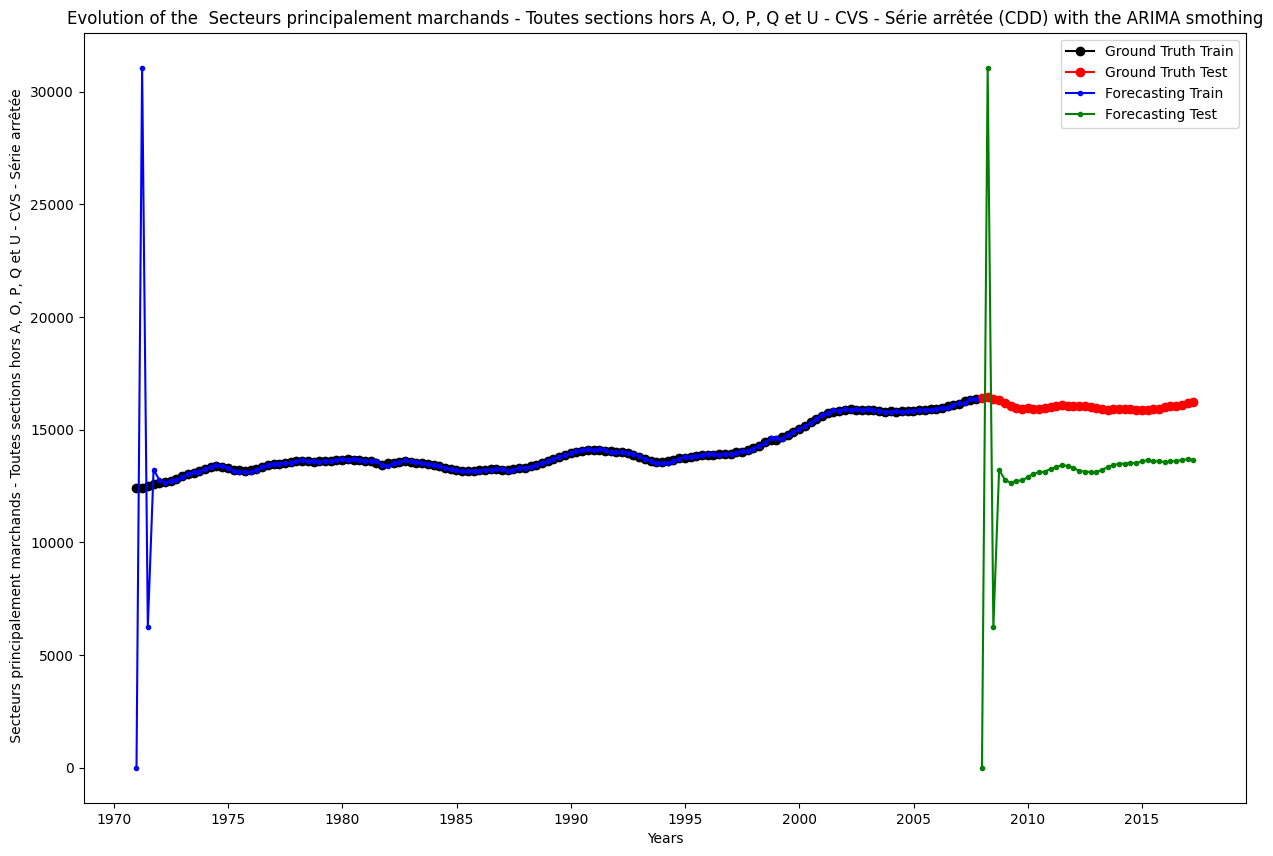

In [ ]:
# do the same for the eessa data sector 1 

best_arima_order_eessa_dataSector1, best_arima_rmse_eessa_dataSector1, model_arima_eessa_dataSector1, predictions_arima_eessa_dataSector1, full_curve_arima_eessa_dataSector1 = find_best_arima_model(test_set_eessa_dataSector1, test_set_eessa_dataSector1_expLis, train_set_eessa_dataSector1_expLis, " Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée", "eessa_dataSector1")
print("Best order for eessa_dataSector1 : ", best_arima_order_eessa_dataSector1)
print("Best RMSE for eessa_dataSector1 : ", best_arima_rmse_eessa_dataSector1)

plot_arima(train_set_eessa_dataSector1, test_set_eessa_dataSector1, train_set_eessa_dataSector1_expLis, model_arima_eessa_dataSector1, predictions_arima_eessa_dataSector1, " Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée")


### Sector 2 :

/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/amine/.local/lib/python3.10/site-packa

Best order for eessa_dataSector2 :  (0, 0, 0)
Best RMSE for eessa_dataSector2 :  1336.552239426445


/home/amine/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


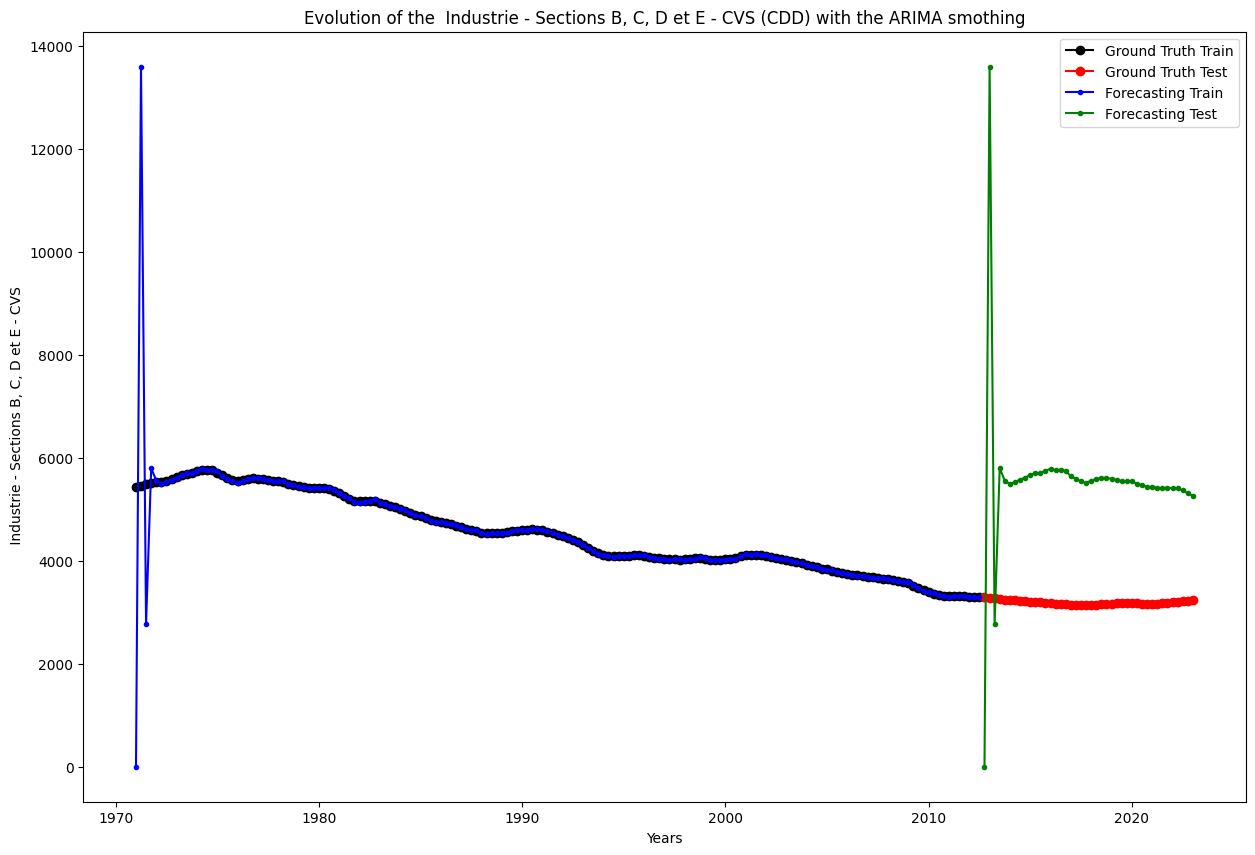

In [ ]:

best_arima_order_eessa_dataSector2, best_arima_rmse_eessa_dataSector2, model_arima_eessa_dataSector2, predictions_arima_eessa_dataSector2, full_curve_arima_eessa_dataSector2 = find_best_arima_model(test_set_eessa_dataSector2, test_set_eessa_dataSector2_expLis, train_set_eessa_dataSector2_expLis, " Industrie - Sections B, C, D et E - CVS", "eessa_dataSector2")
print("Best order for eessa_dataSector2 : ", best_arima_order_eessa_dataSector2)
print("Best RMSE for eessa_dataSector2 : ", best_arima_rmse_eessa_dataSector2)

plot_arima(train_set_eessa_dataSector2, test_set_eessa_dataSector2, train_set_eessa_dataSector2_expLis, model_arima_eessa_dataSector2, predictions_arima_eessa_dataSector2, " Industrie - Sections B, C, D et E - CVS" )


# Model 2  : Holt Winter's Seasonal Model

/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


RMSE for CDD :  60953.49016190245
RMSE for CDI :  61168.44271635499
RMSE for eessa_dataSector1 :  1553.3885863213459
RMSE for eessa_dataSector2 :  222.7497109611865


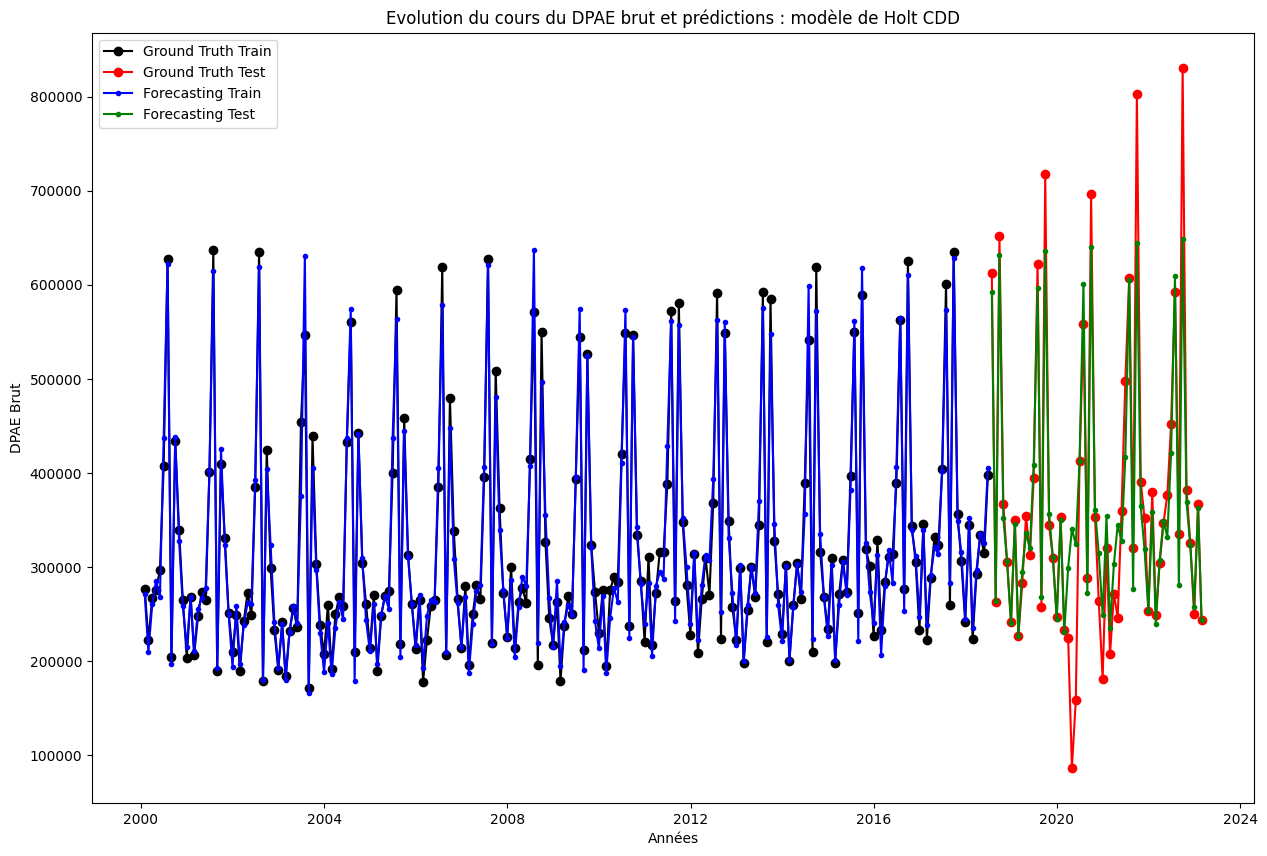

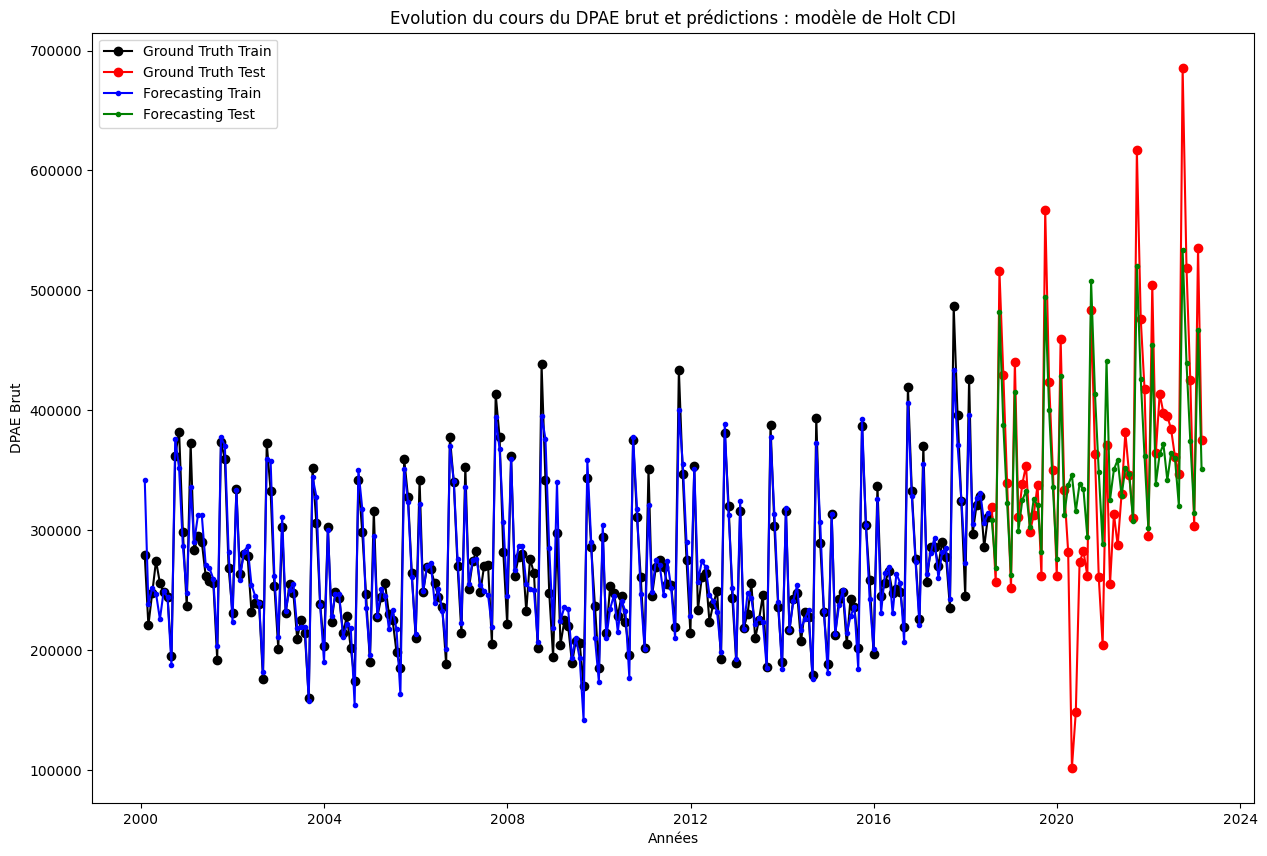

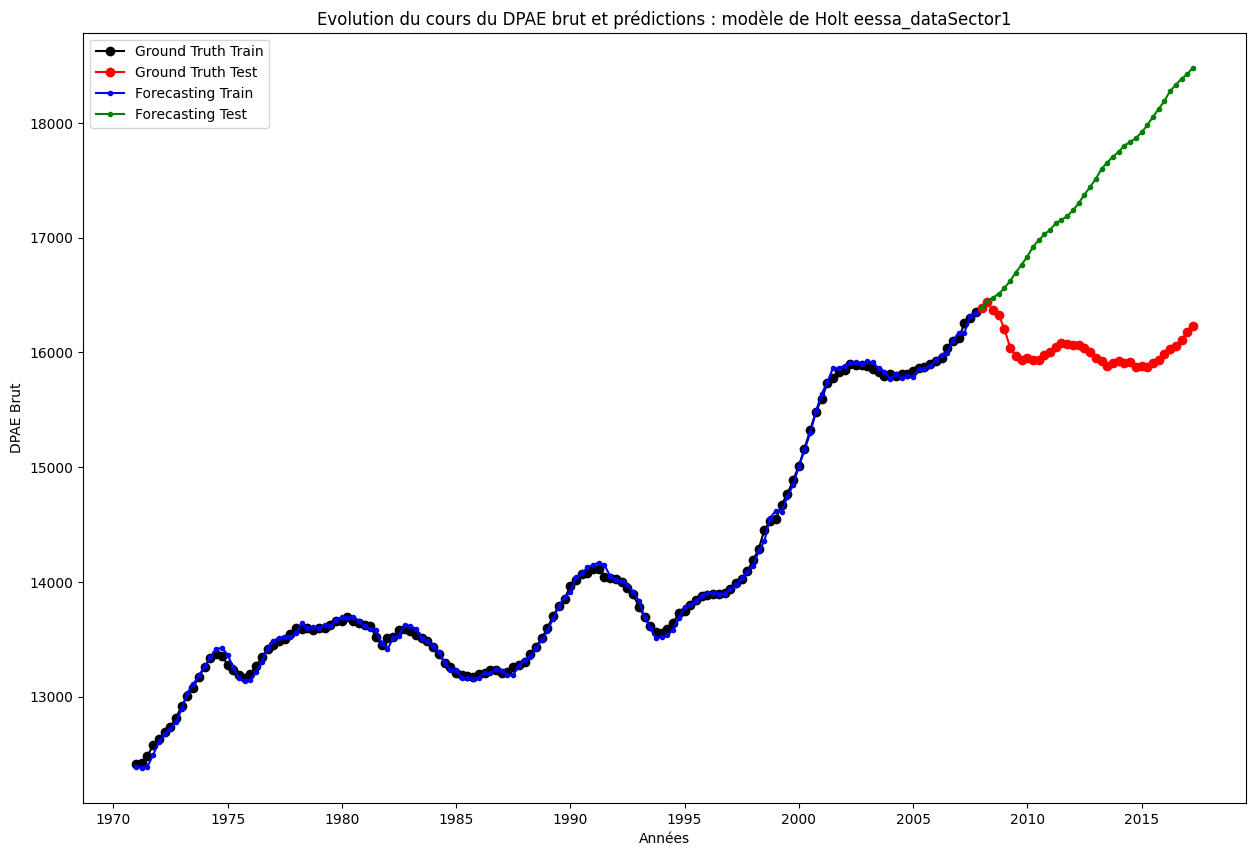

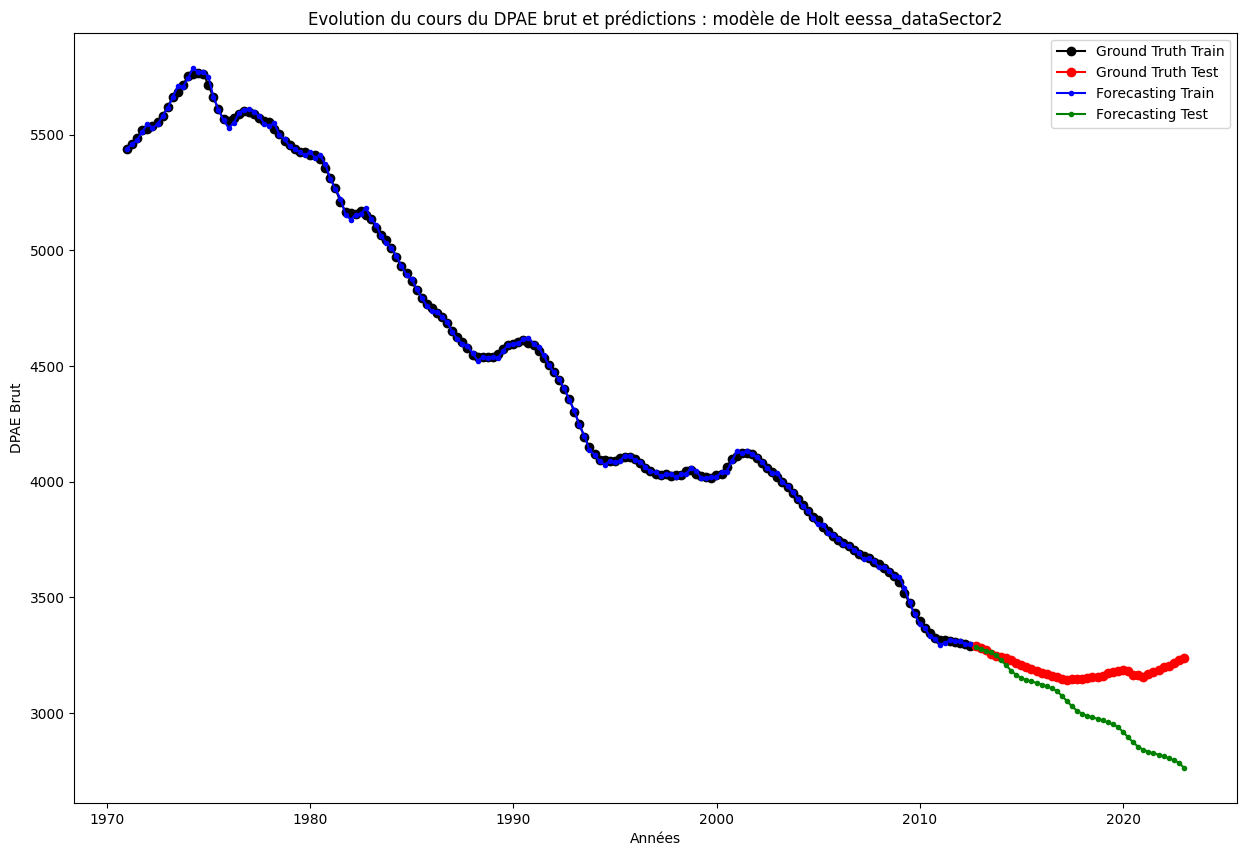

In [ ]:


def holt_model(train_ses, test, column, typo):
    holt = ExponentialSmoothing(train_ses, seasonal_periods = 12, trend = "add", seasonal = "add", use_boxcox = False, initialization_method = "heuristic") 
    model_holt = holt.fit()
    forecast_values_holt = model_holt.forecast(test.shape[0])
    rmse = np.sqrt(mean_squared_error(test[column], forecast_values_holt))
    return model_holt, forecast_values_holt, rmse

model_holt_CDD, forecast_values_CDD_holt, rmse_holt_CDD = holt_model(train_dpae_data_cdd_expLis, test_dpae_data_cdd, "DPAE (brut)", "CDD")
print("RMSE for CDD : ", rmse_holt_CDD)

model_holt_CDI, forecast_values_CDI_holt, rmse_holt_CDI = holt_model(train_dpae_data_cdi_expLis, test_dpae_data_cdi, "DPAE (brut)", "CDI")
print("RMSE for CDI : ", rmse_holt_CDI)


model_holt_eessa_dataSector1, forecast_values_eessa_dataSector1_holt, rmse_holt_eessa_dataSector1 = holt_model(train_set_eessa_dataSector1_expLis, test_set_eessa_dataSector1, " Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée", "eessa_dataSector1")
print("RMSE for eessa_dataSector1 : ", rmse_holt_eessa_dataSector1)

model_holt_eessa_dataSector2, forecast_values_eessa_dataSector2_holt, rmse_holt_eessa_dataSector2 = holt_model(train_set_eessa_dataSector2_expLis, test_set_eessa_dataSector2, " Industrie - Sections B, C, D et E - CVS", "eessa_dataSector2")
print("RMSE for eessa_dataSector2 : ", rmse_holt_eessa_dataSector2)

# create a function to plot the results of the Holt model
def plot_holt(train, test, train_expLis, model_holt, column, forecast_values_holt, title):
    plt.figure(figsize = (15,10))
    plt.plot(train.index,train_expLis, marker="o", color="black", label='Ground Truth Train')
    plt.plot(test.index, test[column], marker="o", color = "red", label = 'Ground Truth Test')
    plt.plot(train.index,model_holt.fittedvalues, marker=".", color="blue", label='Forecasting Train')
    plt.plot(test.index,forecast_values_holt, marker=".", color = "green", label = 'Forecasting Test')
    plt.ylabel("DPAE Brut")
    plt.xlabel("Années")
    plt.title("Evolution du cours du DPAE brut et prédictions : modèle de Holt " + title)
    plt.legend(loc='best')
    plt.show()

plot_holt(train_dpae_data_cdd, test_dpae_data_cdd, train_dpae_data_cdd_expLis, model_holt_CDD, "DPAE (brut)", forecast_values_CDD_holt, "CDD")

plot_holt(train_dpae_data_cdi, test_dpae_data_cdi, train_dpae_data_cdi_expLis, model_holt_CDI, "DPAE (brut)", forecast_values_CDI_holt, "CDI")

plot_holt(train_set_eessa_dataSector1, test_set_eessa_dataSector1, train_set_eessa_dataSector1_expLis, model_holt_eessa_dataSector1, " Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée", forecast_values_eessa_dataSector1_holt, "eessa_dataSector1")

plot_holt(train_set_eessa_dataSector2, test_set_eessa_dataSector2, train_set_eessa_dataSector2_expLis, model_holt_eessa_dataSector2, " Industrie - Sections B, C, D et E - CVS", forecast_values_eessa_dataSector2_holt, "eessa_dataSector2")



In [ ]:
# create a table that compare the results of the different models
def compare_models(rmse_arima_CDD, rmse_arima_CDI, rmse_arima_eessa_dataSector1, rmse_arima_eessa_dataSector2, rmse_holt_CDD, rmse_holt_CDI, rmse_holt_eessa_dataSector1, rmse_holt_eessa_dataSector2):
    rmse = pd.DataFrame({'ARIMA': [rmse_arima_CDD, rmse_arima_CDI, rmse_arima_eessa_dataSector1, rmse_arima_eessa_dataSector2], 'Holt': [rmse_holt_CDD, rmse_holt_CDI, rmse_holt_eessa_dataSector1, rmse_holt_eessa_dataSector2]}, index = ['CDD', 'CDI', 'eessa_dataSector1', 'eessa_dataSector2'])
    return rmse

rmse = compare_models(best_arima_rmse_CDD, best_arima_rmse_CDI, best_arima_rmse_eessa_dataSector1, best_arima_rmse_eessa_dataSector2, rmse_holt_CDD, rmse_holt_CDI, rmse_holt_eessa_dataSector1, rmse_holt_eessa_dataSector2)
print(rmse)

                           ARIMA          Holt
CDD                164147.348528  60953.490162
CDI                139833.715200  61168.442716
eessa_dataSector1    1985.120974   1553.388586
eessa_dataSector2    1336.552239    222.749711


# Question 6 : Bonus


/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/amine/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/home/am

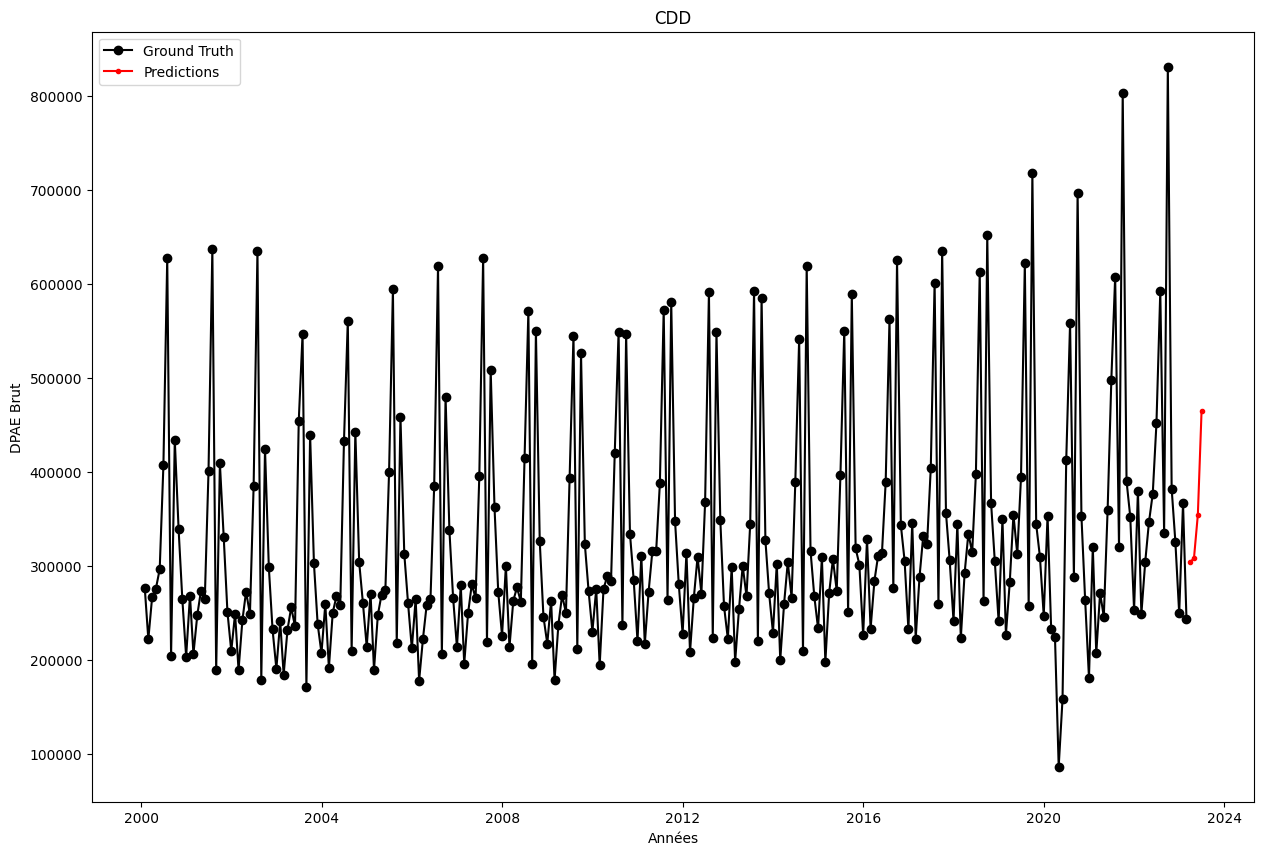

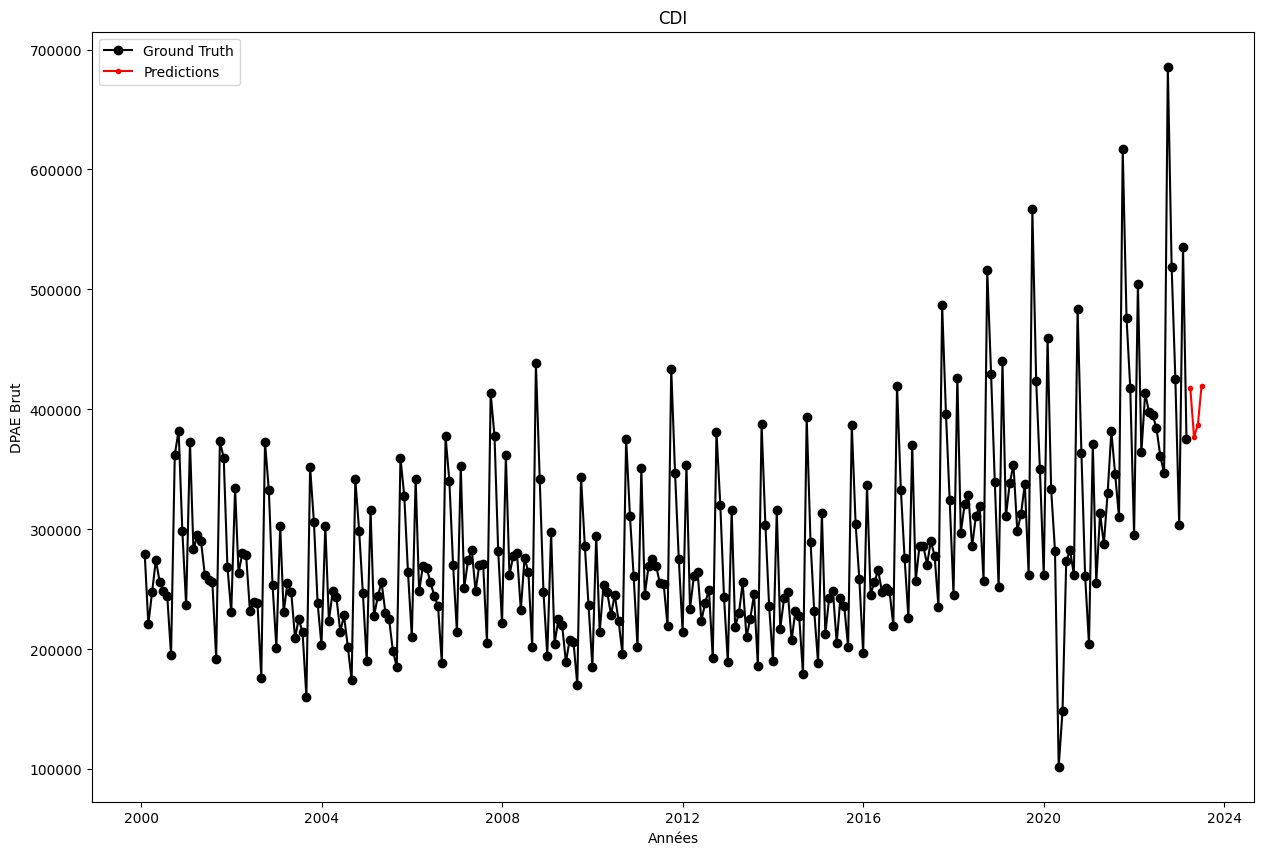

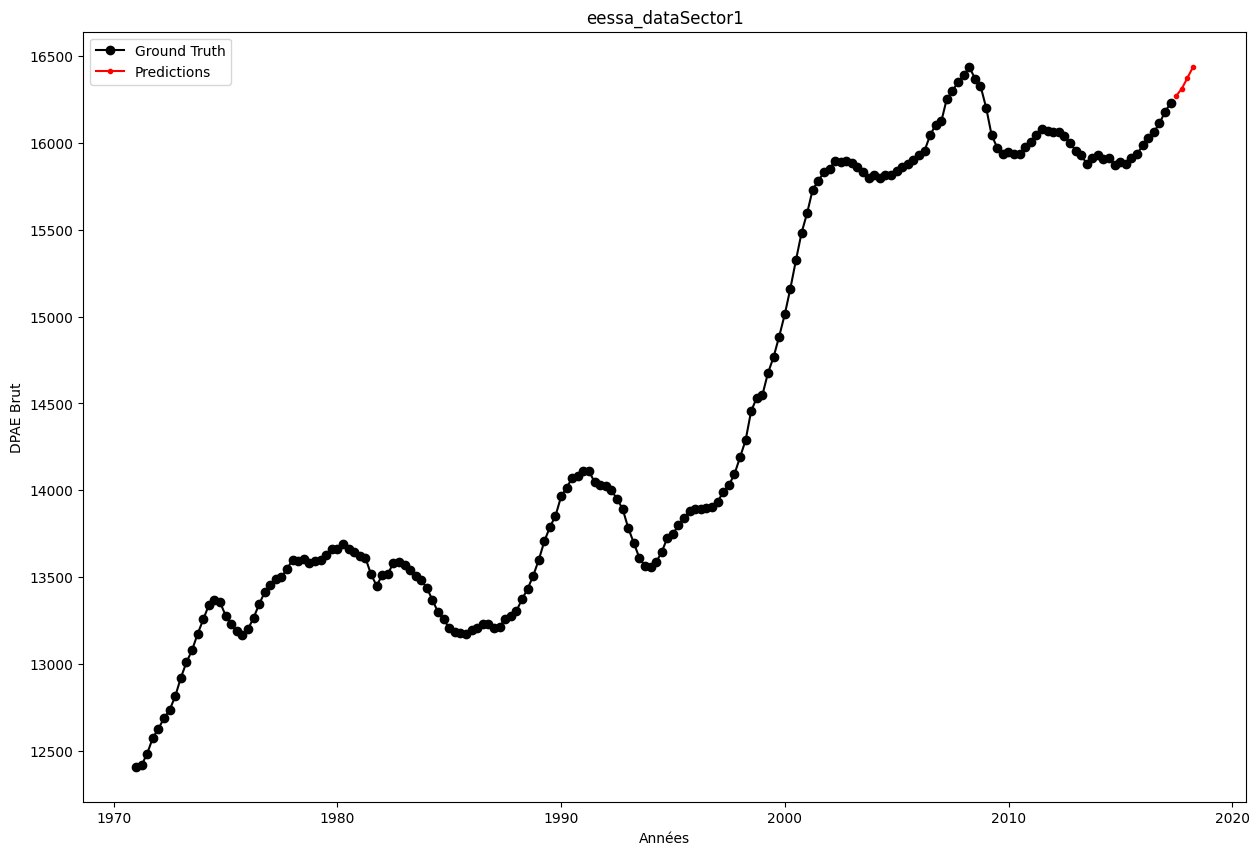

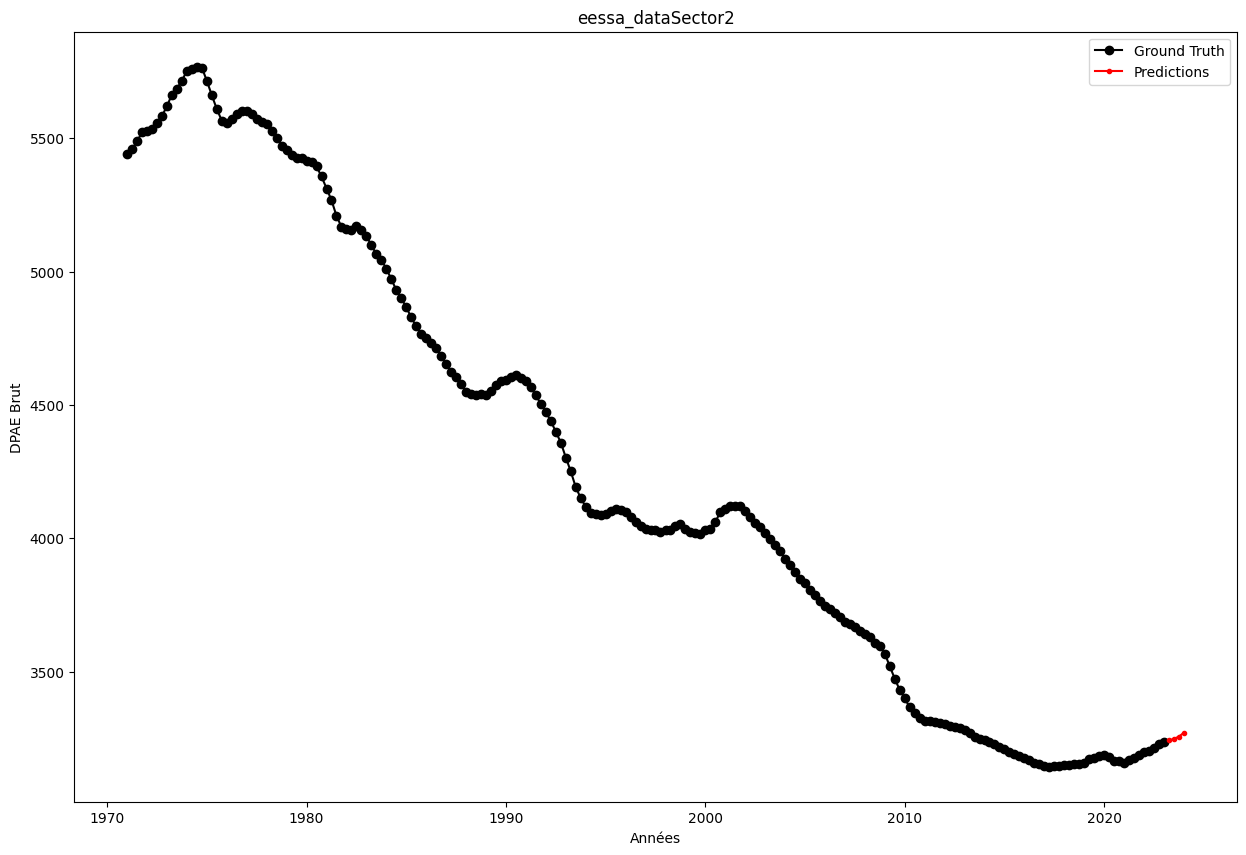

In [ ]:


# create a function from the previous code 
def holt_model_bonus(train, column):
    holt = ExponentialSmoothing(train[column], seasonal_periods = 12, trend = "add", seasonal = "add", use_boxcox = False, initialization_method = "heuristic") 
    model_holt = holt.fit()
    forecast_values_holt = model_holt.forecast(4)
    full_curve = np.concatenate((model_holt.fittedvalues, forecast_values_holt))
    return model_holt, forecast_values_holt, full_curve

model_holt_CDD, forecast_values_CDD_holt, full_curve_CDD = holt_model_bonus(dpae_data_cdd, "DPAE (brut)")
model_holt_CDI, forecast_values_CDI_holt, full_curve_CDI = holt_model_bonus(dpae_data_cdi, "DPAE (brut)")
model_holt_eessa_dataSector1, forecast_values_eessa_dataSector1_holt, full_curve_eessa_dataSector1 = holt_model_bonus(eessa_dataSector1, " Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée")
model_holt_eessa_dataSector2, forecast_values_eessa_dataSector2_holt, full_curve_eessa_dataSector2 = holt_model_bonus(eessa_dataSector2, " Industrie - Sections B, C, D et E - CVS")

# create a function that plot the results

def plot_holt_bonus(data, title, forecast_values, column):
    plt.figure(figsize = (15,10))
    plt.plot(data.index, data[column], marker="o", color = "black", label = 'Ground Truth')
    plt.plot(forecast_values, marker=".", color = "red", label = 'Predictions')
    plt.ylabel("DPAE Brut")
    plt.xlabel("Années")
    plt.title(title)
    plt.legend(loc='best')
    plt.show()
    
plot_holt_bonus(dpae_data_cdd, "CDD", forecast_values_CDD_holt, "DPAE (brut)")
plot_holt_bonus(dpae_data_cdi, "CDI", forecast_values_CDI_holt, "DPAE (brut)")
plot_holt_bonus(eessa_dataSector1, "eessa_dataSector1", forecast_values_eessa_dataSector1_holt, " Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée")
plot_holt_bonus(eessa_dataSector2, "eessa_dataSector2", forecast_values_eessa_dataSector2_holt, " Industrie - Sections B, C, D et E - CVS")
